# Домашнее задание по дисциплине "Практикум по программированию"

### Содержание

* [0. Описание задачи и признаков](#chapter0)
    * [0.1. Описание задачи](#section_0_1)
    * [0.2. Описание исходных данных](#section_0_2)
    * [0.3. Создание и фиксация виртуального окружения](#section_0_3)
* [1. Предварительная обработка данных](#chapter1)
    * [1.1. Чтение и загрузка данных](#section_1_1)
    * [1.2. Первичный анализ данных](#section_1_2)
    * [1.3. Разделение выборки на обучающую и тестовую выборки](#section_1_3)
    * [1.4. Кодирование категориальных признаков](#section_1_4)
    * [1.5. Обработка вещественных признаков (заполнение пропусков)](#section_1_5)
    * [1.6. Детекция выбросов и аномалий в данных](#section_1_6)
    * [1.7. Подведение итогов раздела 1](#section_1_7)
* [2. Генерация новых признаков](#chapter2)
    * [2.1. Корреляционный анализ входных признаков (построение тепловых карт корреляции)](#section_2_1)
    * [2.2. Исправление проблемы мультиколлинеарности в данных](#section_2_2)
    * [2.3. Скалирование данных](#section_2_3)
    * [2.4. Подведение итогов раздела 2](#section_2_4)
* [3. Выбор моделей ML и метрик](#chapter3)
* [4. Обучение моделей ML и подбор гиперпараметров](#chapter4)
* [5. Вычисление метрик на новых данных](#chapter5)
* [6. Результат работы](#chapter6)

# 0. Описание задачи и признаков <a class="anchor" id="chapter0"></a>

## 0.1. Описание задачи <a class="anchor" id="section_0_1"></a>

Из файла мы можем понять, что суть рабоыт заключается в прогнозировании коэффициента Гармонии Бессмертия. Он будет является целевый призниаком и отвечать за состояние портала. Судя по тому, какие значения принимает этот коэффициент мы можем понять, что решать будем задачу регрессиии, то есть предсказывать изменения этого коэффициента на основе входных параметров работы портала.

## 0.2. Описание исходных данных <a class="anchor" id="section_0_2"></a>

Набор данных содержит параметры работы магического портала, собранные в процессе его функционирования. Всего представлено 20 признаков (включая целевую переменную), а также уникальный идентификатор записи.

| №  | Название признака                          | Семантическое описание                                                                 | Ожидаемый тип данных |
|----|--------------------------------------------|----------------------------------------------------------------------------------------|----------------------|
| 1  | Вектор Мощи                                | Позиция магического механизма, управляющего интенсивностью перехода через портал     | float / int          |
| 2  | Скорость перехода через портал             | Скорость, с которой портал перемещает объект через пространство                     | float                |
| 3  | Приток Силы Потока                         | Поток магической силы, текущий через ядро портала, обеспечивающий его стабильность   | float                |
| 4  | Ритм магического ядра                      | Число оборотов магического ядра портала в минуту                                      | int / float          |
| 5  | Поток Энергий                              | Число оборотов генератора эфира, преобразующего внешнюю энергию в магическую         | int / float          |
| 6  | Сила Левого Потока                         | Мощность магического потока через левую сторону портала                               | float                |
| 7  | Сила Правого Потока                        | Мощность магического потока через правую сторону портала                              | float                |
| 8  | Пламя Стихий                               | Температура магической энергии из высокого магического источника, °C                 | float                |
| 9  | Температура вдоха Истока                   | Температура воздуха, входящего в магический ускоритель, °C                           | float                |
| 10 | Температура выдоха Истока                  | Температура воздуха, исходящего из магического ускорителя, °C                        | float                |
| 11 | Приток давления Выдоха Истока              | Давление магического потока на выходе из источника высокого давления                 | float                |
| 12 | Давление вдоха Истока                      | Давление воздуха, входящего в магический ускоритель                                   | float                |
| 13 | Давление выдоха Истока                     | Давление воздуха, исходящего из магического ускорителя                                | float                |
| 14 | Древний Ветер                              | Давление древней магической энергии в виде выхлопного потока                          | float                |
| 15 | Печать Чародея                             | Параметр управления магическим впрыском в сердце портала, %                          | float                |
| 16 | Эмульсия Истока                            | Количество магического топлива, подпитывающего портал                                 | float                |
| 17 | Дыхание Истока                             | Коэффициент, отражающий степень угасания магического ускорителя                       | float                |
| 18 | **Гармония Бессмертия** (целевая)          | Коэффициент стабильности магического ядра портала (требует восстановления при снижении) | float                |
| 19 | Тип Вектора Мощи                           | Метка типа позиции магического механизма                                              | category / object    |
| 20 | Номер пометки                              | Уникальный номер записи о работе портала                                              | int                  |

**Формулы прикладной области**

1. **Общая мощность потоков**:
   - Сумма `Силы Левого Потока` и `Силы Правого Потока`:
     $$   P_{\text{потоки}} = \text{Сила Левого Потока} + \text{Сила Правого Потока}   $$
   - Совокупная сила всех потоков:
     $$   P_{\text{все потоки}} = \text{Сила Левого Потока} + \text{Сила Правого Потока} + \text{Приток Силы Потока}   $$

2. **Общая сила ядра**:
   $$   P_{\text{ядро}} = \text{Ритм магического ядра} \times \text{Приток Силы Потока}   $$

3. **Общее давление на выходе**:
   $$   P_{\text{давление}} = \text{Приток давления Выдоха Истока} + \text{Давление выдоха Истока}   $$

4. **Магическая производительность**:
   $$   \text{Производительность} = \frac{\text{Скорость перехода через портал}}{\text{Эмульсия Истока}}   $$

5. **Эффективность ядра**:
   $$   \text{Эффективность ядра} = \frac{P_{\text{ядро}}}{\text{Эмульсия Истока}}   $$

6. **Магическая мощность**:
   $$   P_{\text{магическая}} = \text{Эмульсия Истока} \times P_{\text{давление}} \times |\text{Пламя Стихий} - \text{Температура вдоха Истока}|   $$

7. **Степень износа магических источников**:
   $$   \text{Износ} = \frac{\text{Дыхание Истока}}{\text{Гармония Бессмертия}}   $$

8. **Расхождение в стабильности магии**:
   $$   \text{Расхождение} = |\text{Дыхание Истока} - \text{Гармония Бессмертия}|   $$

9. **Баланс угасания**:
   $$   \text{Баланс угасания} = \frac{\text{Дыхание Истока} - \text{Гармония Бессмертия}}{\text{Скорость перехода через портал}}   $$

**Анализ взаимосвязей и вычислительных формул**

Ниже приведены выражения, которые можно использовать для формирования дополнительных признаков при решении задачи прогнозирования показателя Гармония Бессмертия:

Общая мощность потоков (1): Отражает совокупное влияние потоков, которое может иметь корреляцию с целевым параметром.

Общая сила ядра (2): Характеризует производительность магического ядра, потенциально влияющую на устойчивость портала.

Общее давление на выходе (3): Может служить индикатором стабильности функционирования портала.

Магическая производительность (4): Определяет эффективность использования магического топлива, что способно воздействовать на стабильность системы.

Эффективность ядра (5): Отображает соотношение мощности ядра и расходуемого ресурса, указывая на степень оптимальности его работы.

Магическая мощность (6): Представляет собой комплексный интегральный показатель, объединяющий давление и температурные характеристики, что делает его потенциально значимым для предсказания целевого признака.

Формулы, представленные ниже, не рекомендуется использовать при построении признаков, так как они напрямую содержат целевую переменную Гармония Бессмертия. Это может привести к утечке данных (data leakage) и искажению результатов модели:

Степень износа магических источников (7): Содержит Гармонию Бессмертия в знаменателе, что делает данный показатель некорректным для feature engineering.

Расхождение стабильности магии (8): Прямо использует значение целевой переменной, вызывая риск утечки информации.

Баланс угасания (9): Также зависит от Гармонии Бессмертия, поэтому не должен включаться в набор признаков для обучения модели.

## 0.3. Создание и фиксация виртуального окружения <a class="anchor" id="section_0_3"></a>

**Версия питона**

In [479]:
!python --version

Python 3.12.2


Работа выполнялась на версии питона Python 3.12.2

**Список используемых библиотек**

- pandas
- numpy
- seaborn
- matplotlib
- scikit-learn
- pyod
- optuna

**Основные импорты**

In [480]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Фиксация сида**

In [481]:
seed = 42
np.random.seed(seed)

# 1. Предварительная обработка данных <a class="anchor" id="chapter1"></a>

## 1.1. Чтение и загрузка данных <a class="anchor" id="section_1_1"></a>

In [482]:
df = pd.read_csv('portal_data.csv', sep='|', encoding='cp1251')
df

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи,Номер пометки
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,-,1.096,Не определено,5.947,-,7.137,0.082,0.95,0.975,Слабый,0
1,2.088,-,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975,Слабый,1
2,3.144,4.6299600000000005,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,-,1.389,Не определено,7.574,-,13.086,0.259,0.95,0.975,Ниже среднего,2
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,-,1.658,Не определено,9.007,-,18.109,0.358,0.95,0.975,Ниже среднего,3
4,5.140,7.7166,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,Не определено,11.197,1.026,26.373,0.522,0.95,0.975,Выше среднего,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,7.7166,21624.934,201.516623,8470.013,175.239,175.239,681.658,736,628.95,2.087,Не определено,10.990,1.027,23.803,0.471,1.00,1.000,Выше среднего,11929
11930,6.175,9.25992,29763.213,241.561772,8800.352,245.954,245.954,747.405,736,-,2.512,Не определено,13.109,-,32.671,0.647,1.00,1.000,Выше среднего,11930
11931,7.148,10.80324,39003.867,280.444950,9120.889,332.389,332.389,796.457,736,680.393,2.982,Не определено,15.420,1.036,42.104,0.834,1.00,1.000,Сильный,11931
11932,8.206,12.34656,50992.579,323.315332,9300.274,438.024,438.024,892.945,736,-,3.594,Не определено,18.293,-,58.064,1.149,1.00,1.000,Сильный,11932


## 1.2. Первичный анализ данных <a class="anchor" id="section_1_2"></a>

Выведем информацию о данных при помощи методов `info()`, `nunique()`, `describe()`

In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  11934 non-null  object 
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       11934 non-null  object 
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           11934 non-null  object 
 12  Давление выдоха Истока          

In [484]:
df.nunique()

Вектор Мощи                           9
Скорость перехода через портал       10
Приток Силы Потока                11430
Ритм магического ядра              3888
Поток Энергий                     11834
Сила Левого Потока                 4286
Сила Правого Потока                4286
Пламя Стихий                      11772
Температура вдоха Истока              1
Температура выдоха Истока          2369
Приток давления Выдоха Истока       524
Давление вдоха Истока                 2
Давление выдоха Истока             4209
Древний Ветер                        20
Печать Чародея                     8496
Эмульсия Истока                     696
Дыхание Истока                       51
Гармония Бессмертия                  26
Тип Вектора Мощи                      4
Номер пометки                     11934
dtype: int64

In [485]:
df.describe()

,Вектор Мощи,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Номер пометки
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000,11934.000000
mean,5.166667,27247.498685,223.711688,8200.947312,227.335768,227.335768,735.495446,736.0,2.352963,12.297123,33.641261,0.662440,0.97500,0.9875,5966.500000
std,2.626388,22148.613155,81.061874,1091.315507,200.495889,200.495889,173.680552,0.0,1.084770,5.337448,25.841363,0.507132,0.01472,0.0075,3445.193391
min,1.138000,253.547000,136.939406,6589.002000,5.304000,5.304000,442.364000,736.0,1.093000,5.828000,0.000000,0.068000,0.95000,0.9750,0.000000
25%,3.144000,8375.883750,145.220958,7058.324000,60.317000,60.317000,589.872750,736.0,1.389000,7.447250,13.677500,0.246000,0.96200,0.9810,2983.250000
50%,5.140000,21630.659000,201.514947,8482.081500,175.268000,175.268000,706.038000,736.0,2.083000,11.092000,25.276500,0.496000,0.97500,0.9875,5966.500000
75%,7.148000,39001.426750,280.447777,9132.606000,332.364750,332.364750,834.066250,736.0,2.981000,15.658000,44.552500,0.882000,0.98800,0.9940,8949.750000
max,9.300000,72784.872000,372.879926,9797.103000,645.249000,645.249000,1115.797000,736.0,4.560000,23.140000,92.556000,1.832000,1.00000,1.0000,11933.000000


На основе увиденной информации можно сделать следующие выводы:

- необходимо удлаить столбец Номер пометки, так как он не несёт полезной информации;

- преобразуем строковые значения в NaN и приведём числовые столбцы к float;

- удалим Температура вдоха Истока и Давление вдоха истока, так как они не меняют своих значений.

In [486]:
df.drop(columns=['Номер пометки'], inplace=True)
df = df.replace(['-', 'Не определено'], np.nan)
numeric_cols = df.columns.drop(['Тип Вектора Мощи', 'Гармония Бессмертия'])
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.drop(columns=['Температура вдоха Истока', 'Давление вдоха Истока'])

Посмотрим, как изменились данные

In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  10731 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура выдоха Истока       2387 non-null   float64
 9   Приток давления Выдоха Истока   11934 non-null  float64
 10  Давление выдоха Истока          11934 non-null  float64
 11  Древний Ветер                   2387 non-null   float64
 12  Печать Чародея                  

Теперь видим, что Температура выдоха Истока и Древний Ветер имеют большое количество пропусков, так что они могут быть бесполезны, избавимся от них.

In [488]:
df = df.drop(columns=['Температура выдоха Истока', 'Древний Ветер'])

Посмотрим, как изменились данные

In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  10731 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Приток давления Выдоха Истока   11934 non-null  float64
 9   Давление выдоха Истока          11934 non-null  float64
 10  Печать Чародея                  11934 non-null  float64
 11  Эмульсия Истока                 11934 non-null  float64
 12  Дыхание Истока                  

In [490]:
df.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,1.096,5.947,7.137,0.082,0.95,0.975,Слабый
1,2.088,NaN,6960.180,144.111767,6828.469,28.204,28.204,635.401,1.331,7.282,10.655,0.287,0.95,0.975,Слабый
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,1.389,7.574,13.086,0.259,0.95,0.975,Ниже среднего
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,1.658,9.007,18.109,0.358,0.95,0.975,Ниже среднего
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,2.078,11.197,26.373,0.522,0.95,0.975,Выше среднего


## 1.3. Разделение выборки на обучающую и тестовую выборки <a class="anchor" id="section_1_3"></a>

Теперь сформируем обучающую и тестовую выборки с соотношением 80/20

Можем позволить тестовую выборку в 20 процентов из-за большого объёма датасета (около 12 000 записей)

In [491]:
y_columns = ['Гармония Бессмертия']
train_df, test_df = train_test_split(df, shuffle=True, random_state=seed, test_size=0.2)

X_train, X_test = train_df.drop(columns=y_columns), test_df.drop(columns=y_columns)
y_train, y_test = train_df[y_columns], test_df[y_columns]

## 1.4. Кодирование категориальных признаков <a class="anchor" id="section_1_4"></a>

В датасете есть категориальный признак `Тип Вектора Мощи`. Судя по содержимому (например: 'Слабый', 'Ниже среднего', 'Выше среднего', 'Сильный') — это упорядоченная категория. Используем Ordinal encoding, чтобы сохранить смысл порядка.

In [492]:
from sklearn.preprocessing import OrdinalEncoder


cat_col = 'Тип Вектора Мощи'

print("Уникальные значения в X_train (train):", X_train[cat_col].unique())

ordered_categories = ['Слабый', 'Ниже среднего', 'Выше среднего', 'Сильный']

ord_enc = OrdinalEncoder(categories=[ordered_categories], dtype=float)
ord_enc.fit(X_train[[cat_col]])

X_train_label = X_train.copy()
X_train_label[cat_col] = ord_enc.transform(X_train[[cat_col]]).astype(float).ravel()

print("\nOrdinal (Label) кодирование выполнено. Примеры значений (после кодирования):")
display(X_train_label[[cat_col]].head(8))

mapping = {cat: float(i) for i, cat in enumerate(ordered_categories)}
print("Mapping (категория -> число):", mapping)

Уникальные значения в X_train (train): ['Выше среднего' 'Слабый' 'Сильный' 'Ниже среднего']

Ordinal (Label) кодирование выполнено. Примеры значений (после кодирования):


,Тип Вектора Мощи
3685,2.0
5886,0.0
6108,3.0
7713,0.0
3499,3.0
4963,2.0
4091,2.0
6489,0.0


Mapping (категория -> число): {'Слабый': 0.0, 'Ниже среднего': 1.0, 'Выше среднего': 2.0, 'Сильный': 3.0}


**Применим обученный кодировщик категориальных признаков к тестовым данным**

In [493]:
X_test_label = X_test.copy()

X_test_label[cat_col] = ord_enc.transform(X_test[[cat_col]]).astype(float).ravel()

print("Примеры значений после Label-кодирования в тестовой выборке:")
display(X_test_label[[cat_col]].head(10))

Примеры значений после Label-кодирования в тестовой выборке:


,Тип Вектора Мощи
10172,1.0
10322,3.0
9195,3.0
357,3.0
4352,2.0
6810,3.0
11741,2.0
11640,1.0
9455,2.0
9792,0.0


## 1.5. Обработка вещественных признаков (заполнение пропусков) <a class="anchor" id="section_1_5"></a>

### Заполнение пропусков при помощи статистический подходов

Признак **«Скорость перехода через портал»** содержит пропущенные значения (NaN). Для их заполнения мы сравнили три классические стратегии:

- **mean** — заполнение средним арифметическим
- **median** — заполнение медианой
- **mode** — заполнение модой (наиболее частым значением)

Чтобы выбрать наилучшую стратегию, мы использовали **KL-дивергенцию** (Kullback-Leibler divergence) между распределением значений **до** и **после** заполнения пропусков. Чем меньше значение KL-дивергенции — тем меньше выбранный метод искажает исходное распределение.

1. **Визуализация исходного распределения**  
   Построена гистограмма значений признака до заполнения пропусков (исключены NaN).

2. **Расчёт гистограмм и KL-дивергенции**  
   - Исходная гистограмма (нормализованная, density=True)  
   - Для каждой стратегии: заполняем NaN, строим новую гистограмму на тех же границах бинов, вычисляем KL-дивергенцию  
   - Добавлен небольшой регуляризатор (1e-10) для избежания деления на ноль.

3. **Выбор лучшей стратегии**  
   Стратегия с минимальной KL-дивергенцией считается наименее искажающей распределение.

4. **Финальное заполнение и визуализация**  
   Выбранным значением заполняем все пропуски в столбце и строим итоговую гистограмму.

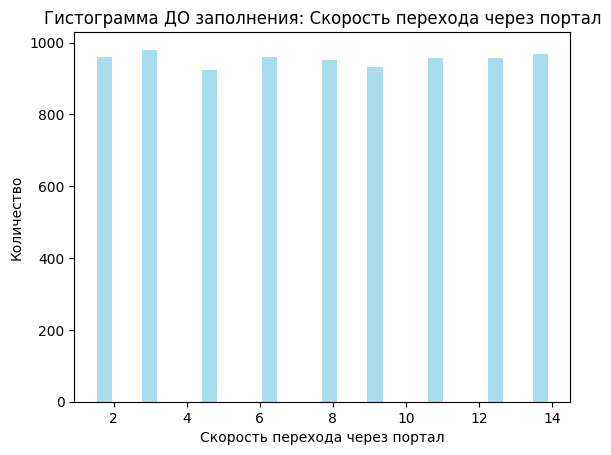

KL-дивергенции для стратегий заполнения:
mean: 0.106094
median: 0.028762
mode: 0.028091

Выбрана стратегия заполнения: mode (3.0866)


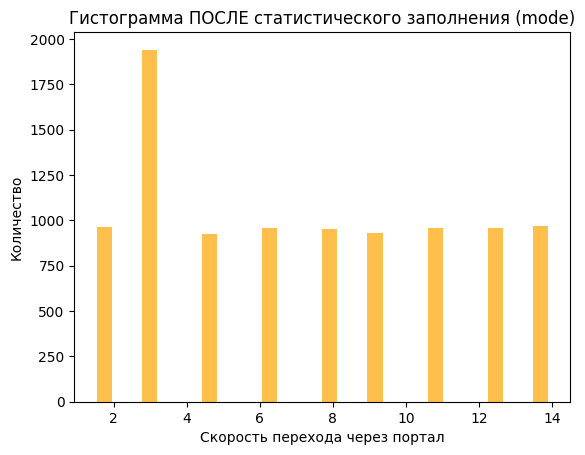

In [494]:
from scipy.stats import entropy


X_train_stat = X_train_label.copy()

col_with_nan = 'Скорость перехода через портал'

plt.hist(X_train_stat[col_with_nan].dropna(), bins=30, alpha=0.7, color='skyblue')
plt.title(f"Гистограмма ДО заполнения: {col_with_nan}")
plt.xlabel(col_with_nan)
plt.ylabel("Количество")
plt.show()

strategies = {
    'mean': X_train_stat[col_with_nan].mean(),
    'median': X_train_stat[col_with_nan].median(),
    'mode': X_train_stat[col_with_nan].mode()[0]
}

kl_results = {}
original_hist, bins = np.histogram(X_train_stat[col_with_nan].dropna(), bins=30, density=True)

for name, value in strategies.items():
    filled = X_train_stat[col_with_nan].fillna(value)
    new_hist, _ = np.histogram(filled, bins=bins, density=True)
    kl_results[name] = entropy(original_hist + 1e-10, new_hist + 1e-10)

print("KL-дивергенции для стратегий заполнения:")
for k, v in kl_results.items():
    print(f"{k}: {v:.6f}")

best_strategy = min(kl_results, key=kl_results.get)
print(f"\nВыбрана стратегия заполнения: {best_strategy} ({strategies[best_strategy]:.4f})")

X_train_stat[col_with_nan] = X_train_stat[col_with_nan].fillna(strategies[best_strategy])

plt.hist(X_train_stat[col_with_nan], bins=30, alpha=0.7, color='orange')
plt.title(f"Гистограмма ПОСЛЕ статистического заполнения ({best_strategy})")
plt.xlabel(col_with_nan)
plt.ylabel("Количество")
plt.show()

Как можем видеть, до заполнения пропусков у нас было нормальное расределение наших данных, а после заполнения у нас появился очевидно заметный высокий столбик со значением примерно равным 3, так как именно этим значением (модой) мы и заполнили наши пропуски, а выбрали заполнение модой, так как там самая низкая KL-дивергенция среди всех выбранных нами стратегий заполнения.

### Заполнение пропусков при помощи машинных подходов

Для более сложного и точного заполнения пропусков в числовых признаках (включая **«Скорость перехода через портал»**) применяется метод **MICE**, реализованный в классе `IterativeImputer` из `sklearn`.

**Основные этапы**

1. **Подготовка данных**  
   Создаётся копия обучающей выборки `X_train_mice`.  
   Выводится количество пропусков до начала заполнения.

2. **Визуализация исходного распределения**  
   Построена гистограмма значений признака **«Скорость перехода через портал»** до заполнения (NaN исключены).

3. **Выбор столбцов для импутации**  
   Импутируются только числовые (float) столбцы с помощью `select_dtypes(include=[float])`.

4. **Применение IterativeImputer (MICE)**  
   - Модель использует итеративный подход: каждый признак с пропусками предсказывается с помощью регрессии на основе остальных признаков.  
   - Процесс повторяется до сходимости.  
   - Фиксируется `random_state` для воспроизводимости.

5. **Оценка качества заполнения**  
   - Построена новая гистограмма после заполнения.  
   - Вычислена **KL-дивергенция** между исходным (до заполнения) и новым распределением.  
   - Чем ниже KL-дивергенция — тем лучше метод сохранил исходное распределение.

6. **Контроль результата**  
   Выводится количество пропусков после импутации.

Пропуски перед машинным заполнением:
Вектор Мощи                         0
Скорость перехода через портал    961
Приток Силы Потока                  0
Ритм магического ядра               0
Поток Энергий                       0
Сила Левого Потока                  0
Сила Правого Потока                 0
Пламя Стихий                        0
Приток давления Выдоха Истока       0
Давление выдоха Истока              0
Печать Чародея                      0
Эмульсия Истока                     0
Дыхание Истока                      0
Тип Вектора Мощи                    0
dtype: int64


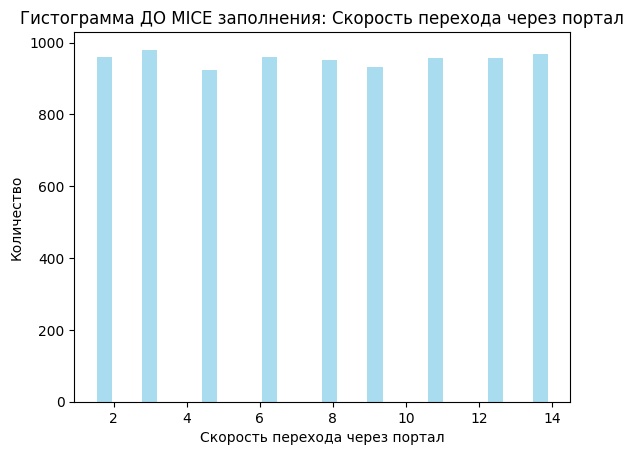


Пропуски после MICE:
Вектор Мощи                       0
Скорость перехода через портал    0
Приток Силы Потока                0
Ритм магического ядра             0
Поток Энергий                     0
Сила Левого Потока                0
Сила Правого Потока               0
Пламя Стихий                      0
Приток давления Выдоха Истока     0
Давление выдоха Истока            0
Печать Чародея                    0
Эмульсия Истока                   0
Дыхание Истока                    0
Тип Вектора Мощи                  0
dtype: int64

KL-дивергенция после MICE: 0.011633


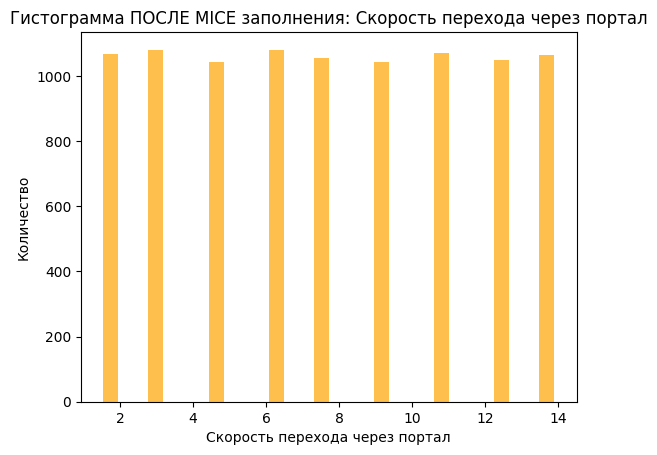

In [495]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


X_train_mice = X_train_label.copy()

print("Пропуски перед машинным заполнением:")
print(X_train_mice.isna().sum())

imputer_cols = X_train_mice.select_dtypes(include=[float]).columns.tolist()

col = 'Скорость перехода через портал'

plt.hist(X_train_mice[col].dropna(), bins=30, alpha=0.7, color='skyblue')
plt.title(f"Гистограмма ДО MICE заполнения: {col}")
plt.xlabel(col)
plt.ylabel("Количество")
plt.show()

original_hist, bins = np.histogram(X_train_mice[col].dropna(), bins=30, density=True)

mice_imputer = IterativeImputer(random_state=seed)
X_train_mice[imputer_cols] = mice_imputer.fit_transform(X_train_mice[imputer_cols])

print("\nПропуски после MICE:")
print(X_train_mice.isna().sum())

filled_mice = X_train_mice[col]
mice_hist, _ = np.histogram(filled_mice, bins=bins, density=True)
kl_mice = entropy(original_hist + 1e-10, mice_hist + 1e-10)

print(f"\nKL-дивергенция после MICE: {kl_mice:.6f}")

plt.hist(X_train_mice[col], bins=30, alpha=0.7, color='orange')
plt.title(f"Гистограмма ПОСЛЕ MICE заполнения: {col}")
plt.xlabel(col)
plt.ylabel("Количество")
plt.show()

Как можем видеть, все пропуски были заполнены. И более того, после заполнения сохранилось равномерное распределение, что является плюсом для дальнейшего обучения моделей. Также понизилась и KL-дивергенция, по сравнению со статистическими подходами.

Ещё один популярный метод машинного заполнения пропусков — **KNNImputer** (k-Nearest Neighbors Imputer) из библиотеки `sklearn`.

Этот метод заполняет пропущенные значения на основе среднего (или другого аггрегата) значений из k ближайших соседей в пространстве признаков.

**Основные этапы**

1. **Подготовка данных**  
   Создаётся копия обучающей выборки `X_train_knn`.  
   Выводится количество пропусков до начала заполнения.

2. **Визуализация исходного распределения**  
   Построена гистограмма признака **«Скорость перехода через портал»** до заполнения (NaN исключены).

3. **Выбор столбцов для импутации**  
   Заполняются только числовые (float) признаки (список `imputer_cols`).

4. **Применение KNNImputer**  
   - Используется 5 ближайших соседей (`n_neighbors=5`).  
   - Заполнение происходит по принципу: для каждого пропущенного значения берётся среднее по k ближайшим соседям в пространстве остальных признаков.

5. **Оценка качества**  
   - Построена новая гистограмма после заполнения.  
   - Рассчитана **KL-дивергенция** между исходным и новым распределением.  
   - Чем меньше KL-дивергенция — тем лучше метод сохранил форму распределения.

6. **Контроль результата**  
   Выводится количество пропусков после импутации.

Пропуски перед KNN заполнением:
Вектор Мощи                         0
Скорость перехода через портал    961
Приток Силы Потока                  0
Ритм магического ядра               0
Поток Энергий                       0
Сила Левого Потока                  0
Сила Правого Потока                 0
Пламя Стихий                        0
Приток давления Выдоха Истока       0
Давление выдоха Истока              0
Печать Чародея                      0
Эмульсия Истока                     0
Дыхание Истока                      0
Тип Вектора Мощи                    0
dtype: int64


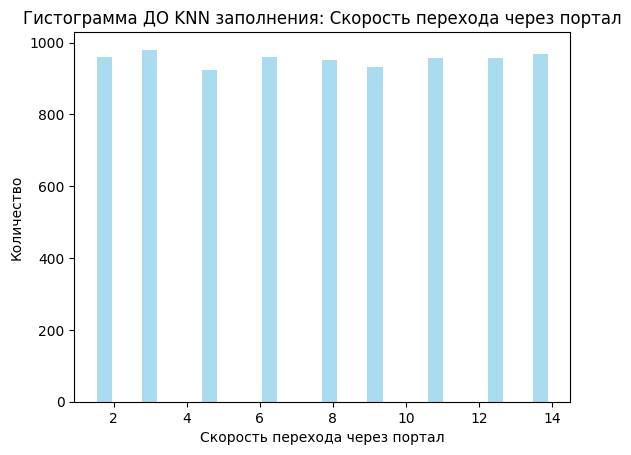


Пропуски после KNN заполнения:
Вектор Мощи                       0
Скорость перехода через портал    0
Приток Силы Потока                0
Ритм магического ядра             0
Поток Энергий                     0
Сила Левого Потока                0
Сила Правого Потока               0
Пламя Стихий                      0
Приток давления Выдоха Истока     0
Давление выдоха Истока            0
Печать Чародея                    0
Эмульсия Истока                   0
Дыхание Истока                    0
Тип Вектора Мощи                  0
dtype: int64

KL-дивергенция после KNN заполнения: 0.000787


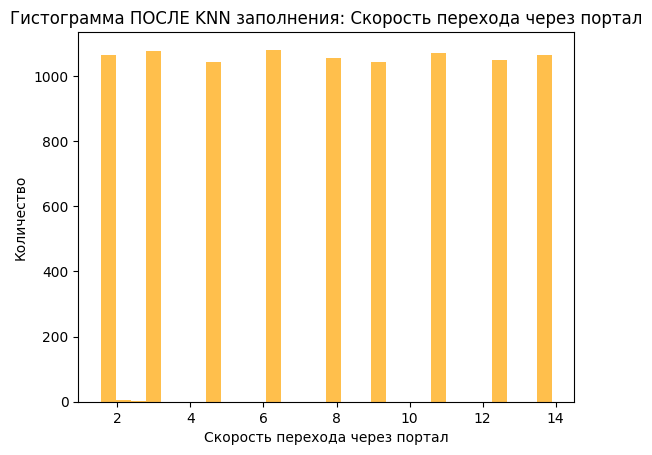


Сравнение KL-дивергенций:
MICE: 0.011633
KNN : 0.000787


In [496]:
from sklearn.impute import KNNImputer


X_train_knn = X_train_label.copy()


print("Пропуски перед KNN заполнением:")
print(X_train_knn.isna().sum())

col = 'Скорость перехода через портал'

plt.hist(X_train_knn[col].dropna(), bins=30, alpha=0.7, color='skyblue')
plt.title(f"Гистограмма ДО KNN заполнения: {col}")
plt.xlabel(col)
plt.ylabel("Количество")
plt.show()

original_hist, bins = np.histogram(X_train_knn[col].dropna(), bins=30, density=True)

knn_imputer = KNNImputer(n_neighbors=5)
X_train_knn[imputer_cols] = knn_imputer.fit_transform(X_train_knn[imputer_cols])

print("\nПропуски после KNN заполнения:")
print(X_train_knn.isna().sum())

filled_knn = X_train_knn[col]
knn_hist, _ = np.histogram(filled_knn, bins=bins, density=True)
kl_knn = entropy(original_hist + 1e-10, knn_hist + 1e-10)

print(f"\nKL-дивергенция после KNN заполнения: {kl_knn:.6f}")

plt.hist(X_train_knn[col], bins=30, alpha=0.7, color='orange')
plt.title(f"Гистограмма ПОСЛЕ KNN заполнения: {col}")
plt.xlabel(col)
plt.ylabel("Количество")
plt.show()

print(f"\nСравнение KL-дивергенций:")
print(f"MICE: {kl_mice:.6f}")
print(f"KNN : {kl_knn:.6f}")

По графикам видно, что после заполнения пропусков при помощи KNNImputer сохраняется предпочтительное для нас исходное равномерное распределение данных. Также этот имеет почти нулевую KL-дивергенцию, поэтому мы оставим именно его.

### Применение полученных результатов к тестовым данным

Используем метод с минимальной kl-дивергенцией, в данном случае KNN.

In [497]:
X_test_knn = X_test_label.copy()

X_test_knn[imputer_cols] = knn_imputer.transform(X_test_knn[imputer_cols])

print("Пропуски в тесте после KNN заполнения:")
print(X_test_knn.isna().sum())

Пропуски в тесте после KNN заполнения:
Вектор Мощи                       0
Скорость перехода через портал    0
Приток Силы Потока                0
Ритм магического ядра             0
Поток Энергий                     0
Сила Левого Потока                0
Сила Правого Потока               0
Пламя Стихий                      0
Приток давления Выдоха Истока     0
Давление выдоха Истока            0
Печать Чародея                    0
Эмульсия Истока                   0
Дыхание Истока                    0
Тип Вектора Мощи                  0
dtype: int64


## 1.6. Детекция выбросов и аномалий в данных <a class="anchor" id="section_1_6"></a>

Мы будем искать выбросы в обучающем датасете `X_train_knn` с использованием двух методов:
1. **IQR** — выбросы определяются как значения, выходящие за пределы [Q1 - k*IQR, Q3 + k*IQR], где k — коэффициент.  
2. **Robust Z-score** — выбросы определяются по отклонению от медианы в единицах MAD (Median Absolute Deviation), используя коэффициент (например, 3).

Мы будем строить диаграммы "Ящик с усами" для каждого признака, чтобы визуально оценить наличие выбросов.

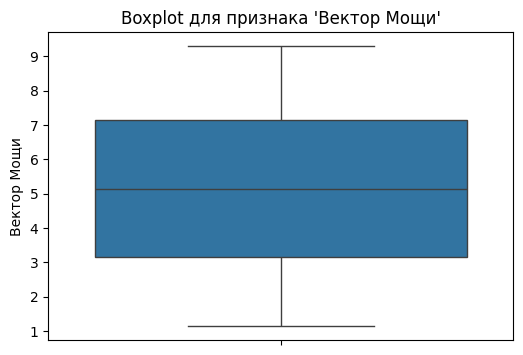

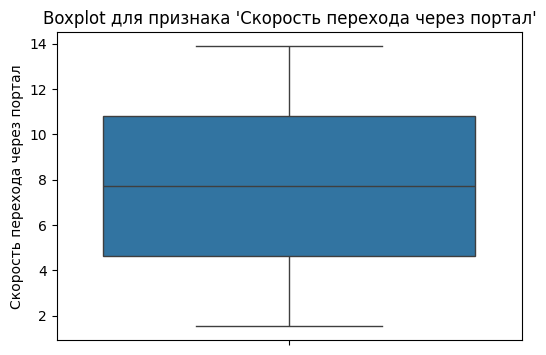

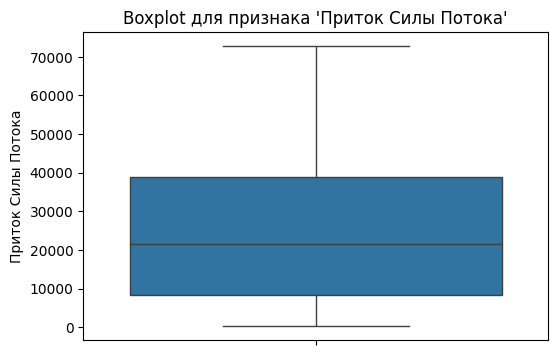

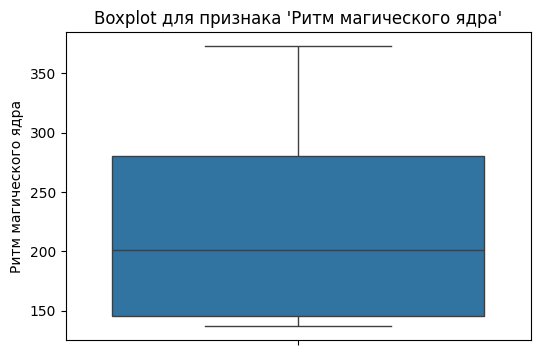

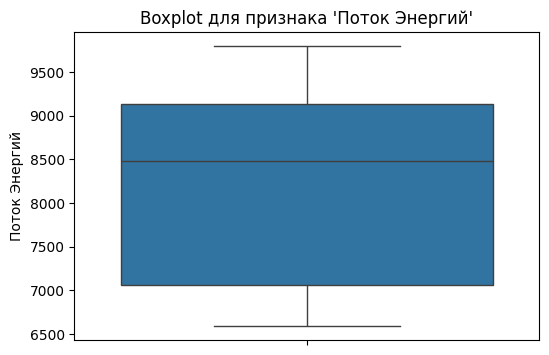

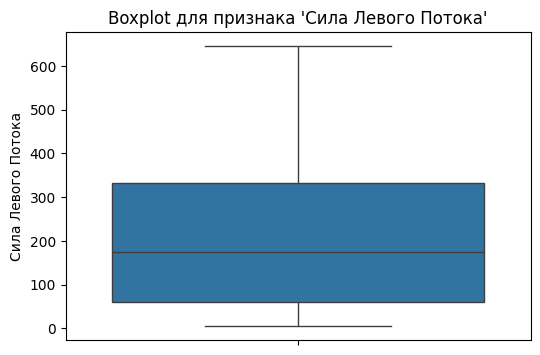

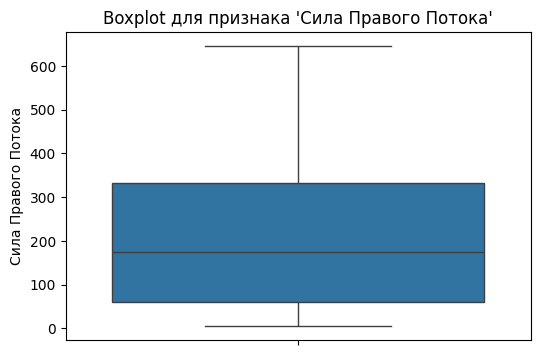

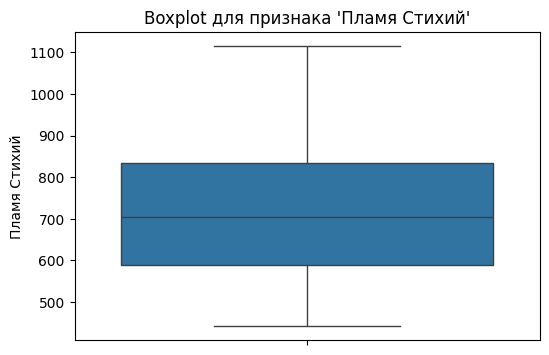

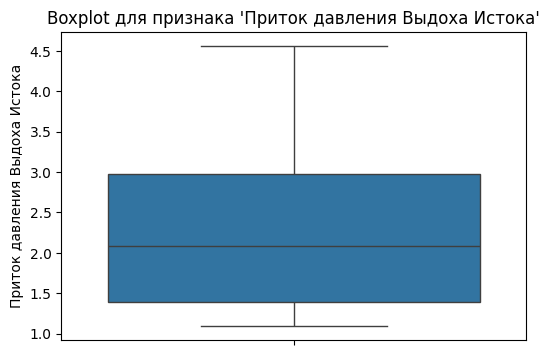

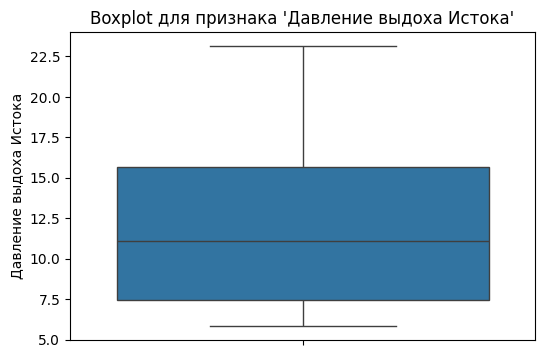

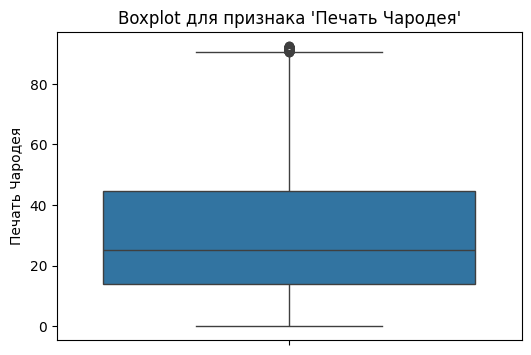

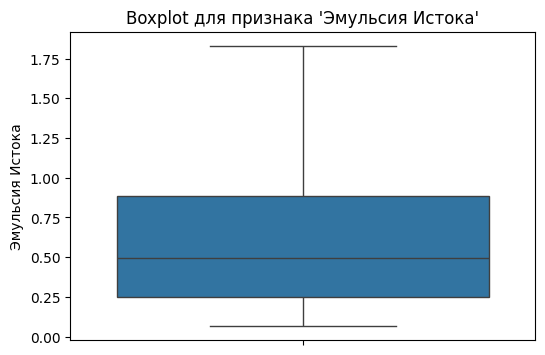

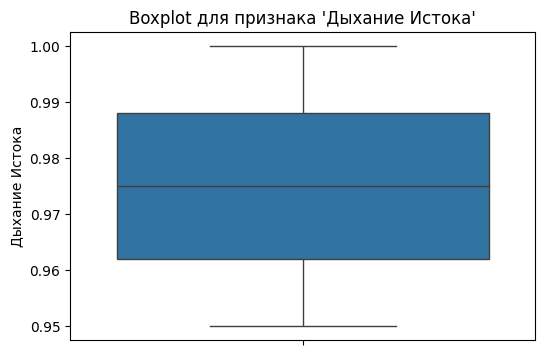

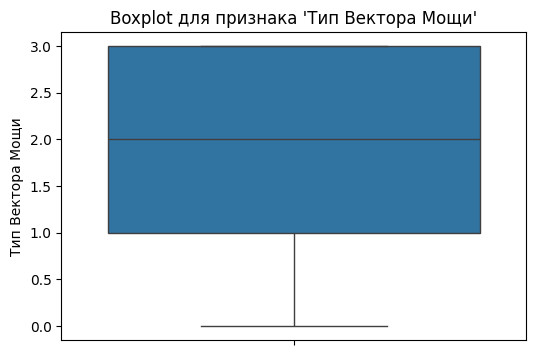

In [498]:
iqr_k = 1.5
robust_z_thresh = 3.0

numeric_cols = X_train_knn.select_dtypes(include=[float]).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=X_train_knn[col])
    plt.title(f"Boxplot для признака '{col}'")
    plt.show()

Как можем видеть из Box plot-ов, у наших данных в целом неплхохое распределение вероятностей, то есть везде медиана лежит в пределах Q1 и Q3. Также мы можем заметить, что есть выбросы в признаке `Печать чародея`.

**Выделение выбросов с помощью IQR и Robust Z-score**

1. Считаем Q1, Q3 и IQR для каждого признака и находим индексы выбросов по IQR.  
2. Считаем медиану и MAD и находим индексы выбросов по Robust Z-score.  
3. Берем пересечение индексов двух методов, чтобы получить "надежные" выбросы для удаления.

In [499]:
outlier_indices = set()

for col in numeric_cols:
    # IQR
    Q1 = X_train_knn[col].quantile(0.25)
    Q3 = X_train_knn[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_lower = Q1 - iqr_k * IQR
    iqr_upper = Q3 + iqr_k * IQR
    iqr_outliers = X_train_knn[(X_train_knn[col] < iqr_lower) | (X_train_knn[col] > iqr_upper)].index
    
    # Robust Z-score
    median = X_train_knn[col].median()
    mad = np.median(np.abs(X_train_knn[col] - median))
    if mad == 0:
        mad = 1e-6
    robust_z = np.abs((X_train_knn[col] - median) / mad)
    robust_outliers = X_train_knn[robust_z > robust_z_thresh].index
    
    col_outliers = set(iqr_outliers).intersection(robust_outliers)
    
    print(f"Признак '{col}': найдено {len(col_outliers)} выбросов (пересечение IQR и Robust Z-score)")
    
    outlier_indices.update(col_outliers)

print(f"\nВсего строк с выбросами по пересечению методов: {len(outlier_indices)}")

Признак 'Вектор Мощи': найдено 0 выбросов (пересечение IQR и Robust Z-score)
Признак 'Скорость перехода через портал': найдено 0 выбросов (пересечение IQR и Robust Z-score)
Признак 'Приток Силы Потока': найдено 0 выбросов (пересечение IQR и Robust Z-score)
Признак 'Ритм магического ядра': найдено 0 выбросов (пересечение IQR и Robust Z-score)
Признак 'Поток Энергий': найдено 0 выбросов (пересечение IQR и Robust Z-score)
Признак 'Сила Левого Потока': найдено 0 выбросов (пересечение IQR и Robust Z-score)
Признак 'Сила Правого Потока': найдено 0 выбросов (пересечение IQR и Robust Z-score)
Признак 'Пламя Стихий': найдено 0 выбросов (пересечение IQR и Robust Z-score)
Признак 'Приток давления Выдоха Истока': найдено 0 выбросов (пересечение IQR и Robust Z-score)
Признак 'Давление выдоха Истока': найдено 0 выбросов (пересечение IQR и Robust Z-score)
Признак 'Печать Чародея': найдено 186 выбросов (пересечение IQR и Robust Z-score)
Признак 'Эмульсия Истока': найдено 0 выбросов (пересечение IQR и 

Как результат пересечения двух методов получили 186 строк с выбросами. Как мы и раньше могли видеть, все выбросы были найдены только с признаке `Печать чародея`.

Удалим эти выбросы.

In [500]:
print(f"Размер обучающего датасета до удаления выбросов: {X_train_knn.shape[0]}")

X_train_no_outliers = X_train_knn.drop(index=outlier_indices)
y_train_no_outliers = y_train.loc[X_train_no_outliers.index]

print(f"Размер обучающего датасета после удаления выбросов: {X_train_no_outliers.shape[0]}")
print(f"Удалено строк: {X_train_knn.shape[0] - X_train_no_outliers.shape[0]}")

Размер обучающего датасета до удаления выбросов: 9547
Размер обучающего датасета после удаления выбросов: 9361
Удалено строк: 186


**Поиск аномалий при помощи алгоритмов Isolation Forest, One-class SVM**

Применим `StandardScaler` к числовым столбцам (`float`) обучающей выборки.  
Результат — `X_scaled` с нулевым средним и единичной дисперсией по каждому признаку.

In [501]:
from sklearn.preprocessing import StandardScaler


numeric_cols = X_train_knn.select_dtypes(include=[float]).columns.tolist()
X_train_num = X_train_knn[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_num)

Применим два алгоритма без учителя для выявления аномалий в стандартизованных данных:

1. **Isolation Forest**  
   - `contamination=0.02` — ожидаемая доля аномалий 2%  
   - `random_state=42` — для воспроизводимости

2. **One-Class SVM**  
   - `nu=0.02` — верхняя граница доли аномалий  
   - `kernel='rbf'`, `gamma='scale'` — радиальная базисная функция

Это позволяет оценить, насколько согласованно алгоритмы выявляют выбросы в данных.

Количество аномалий:
Isolation Forest: 190
One-Class SVM   : 192


/var/folders/y7/8p0z3r756x3301x4qtbvxwyh0000gn/T/ipykernel_28132/4290848528.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=algo_names, y=counts, palette='viridis')


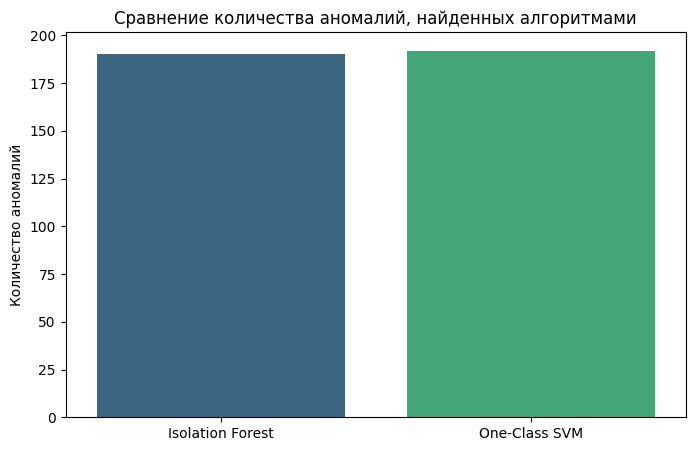

In [502]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM


iforest = IsolationForest(contamination=0.02, random_state=42)
if_labels = iforest.fit_predict(X_scaled)
if_outliers = np.where(if_labels == -1)[0]

ocsvm = OneClassSVM(nu=0.02, kernel='rbf', gamma='scale')
svm_labels = ocsvm.fit_predict(X_scaled)
ocsvm_outliers = np.where(svm_labels == -1)[0]

print(f"Количество аномалий:")
print(f"Isolation Forest: {len(if_outliers)}")
print(f"One-Class SVM   : {len(ocsvm_outliers)}")

algo_names = ['Isolation Forest', 'One-Class SVM']
counts = [len(if_outliers), len(ocsvm_outliers)]

plt.figure(figsize=(8, 5))
sns.barplot(x=algo_names, y=counts, palette='viridis')
plt.ylabel("Количество аномалий")
plt.title("Сравнение количества аномалий, найденных алгоритмами")
plt.show()

Как видим, оба алгоритма нашли примерно одинаковое количество аномалий

Для удобства интерпретации результатов применим **PCA** (2 главные компоненты) к стандартизованным данным `X_scaled`.

**Этапы:**
1. `PCA(n_components=2)` снижение размерности до 2D
2. `fit_transform` проекция данных в пространство PC1 и PC2
3. Построены два графика:
   - **Isolation Forest**: аномалии (красные) vs нормальные точки (синие)
   - **One-Class SVM**: аномалии (красные) vs нормальные точки (синие)

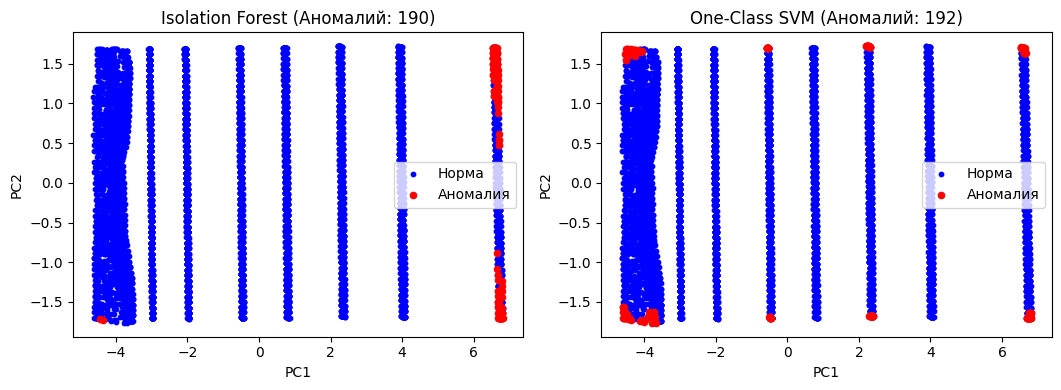

In [503]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(16, 4))

algos = [('Isolation Forest', if_outliers),
         ('One-Class SVM', ocsvm_outliers)]

for i, (name, outliers) in enumerate(algos, 1):
    plt.subplot(1, 3, i)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], color='blue', s=10, label='Норма')
    plt.scatter(X_pca[outliers, 0], X_pca[outliers, 1], color='red', s=20, label='Аномалия')
    plt.title(f"{name} (Аномалий: {len(outliers)})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()

plt.tight_layout()
plt.show()

Можем видеть, что в некоторвых местах этого графика есть пересечения обоих алгоритмов (красные точки)

Найдём количество строк, которые **оба** алгоритма (Isolation Forest и One-Class SVM) признали аномалиями:  
`len(anomaly_positions)`

In [504]:
if_set = set(if_outliers)
svm_set = set(ocsvm_outliers)

anomaly_positions = np.array(list(if_set.intersection(svm_set)))
print(f"Всего строк, признанных аномальными всеми методами: {len(anomaly_positions)}")

Всего строк, признанных аномальными всеми методами: 58


Удалим строки, признанные аномалиями **обоими** методами (Isolation Forest + One-Class SVM).  
- Размер до: `{X_train_knn.shape[0]}`  
- Размер после: `{X_train_no_anomalies.shape[0]}`  
- Удалено: `{len(anomaly_indices)}` строк

In [505]:
print(f"Размер обучающего датасета до удаления аномалий: {X_train_knn.shape[0]}")

anomaly_indices = X_train_knn.iloc[anomaly_positions].index

X_train_no_anomalies = X_train_knn.drop(index=anomaly_indices)
y_train_no_anomalies = y_train.loc[X_train_no_anomalies.index]

print(f"Размер обучающего датасета после удаления аномалий: {X_train_no_anomalies.shape[0]}")
print(f"Удалено строк: {len(anomaly_indices)}")

Размер обучающего датасета до удаления аномалий: 9547
Размер обучающего датасета после удаления аномалий: 9489
Удалено строк: 58


Посмотрим, как изменился наш датасет

In [506]:
X_train_no_anomalies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9489 entries, 3685 to 7270
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     9489 non-null   float64
 1   Скорость перехода через портал  9489 non-null   float64
 2   Приток Силы Потока              9489 non-null   float64
 3   Ритм магического ядра           9489 non-null   float64
 4   Поток Энергий                   9489 non-null   float64
 5   Сила Левого Потока              9489 non-null   float64
 6   Сила Правого Потока             9489 non-null   float64
 7   Пламя Стихий                    9489 non-null   float64
 8   Приток давления Выдоха Истока   9489 non-null   float64
 9   Давление выдоха Истока          9489 non-null   float64
 10  Печать Чародея                  9489 non-null   float64
 11  Эмульсия Истока                 9489 non-null   float64
 12  Дыхание Истока                  9489

Теперь мы имеем одинаковое количество записей в каждом признаке

## 1.7. Подведение итогов раздела 1 <a class="anchor" id="section_1_7"></a>

В ходе первого пункта работы мы загрузили наш датасет, провели первичный анализ данных, разделили выборку на обучающую и тестовую, закодировали категориальные признаки, обработали вещественные признаки (заполнили пропуски), удалили выбросы и аномалии. Таким образом, мы подготовили наш датасет для дальнейшей работы.

# 2. Генерация новых признаков <a class="anchor" id="chapter2"></a>

## 2.1. Корреляционный анализ входных признаков (построение тепловых карт корреляции) <a class="anchor" id="section_2_1"></a>

Построим тепловую карту корреляции входных признаков обучающих данных

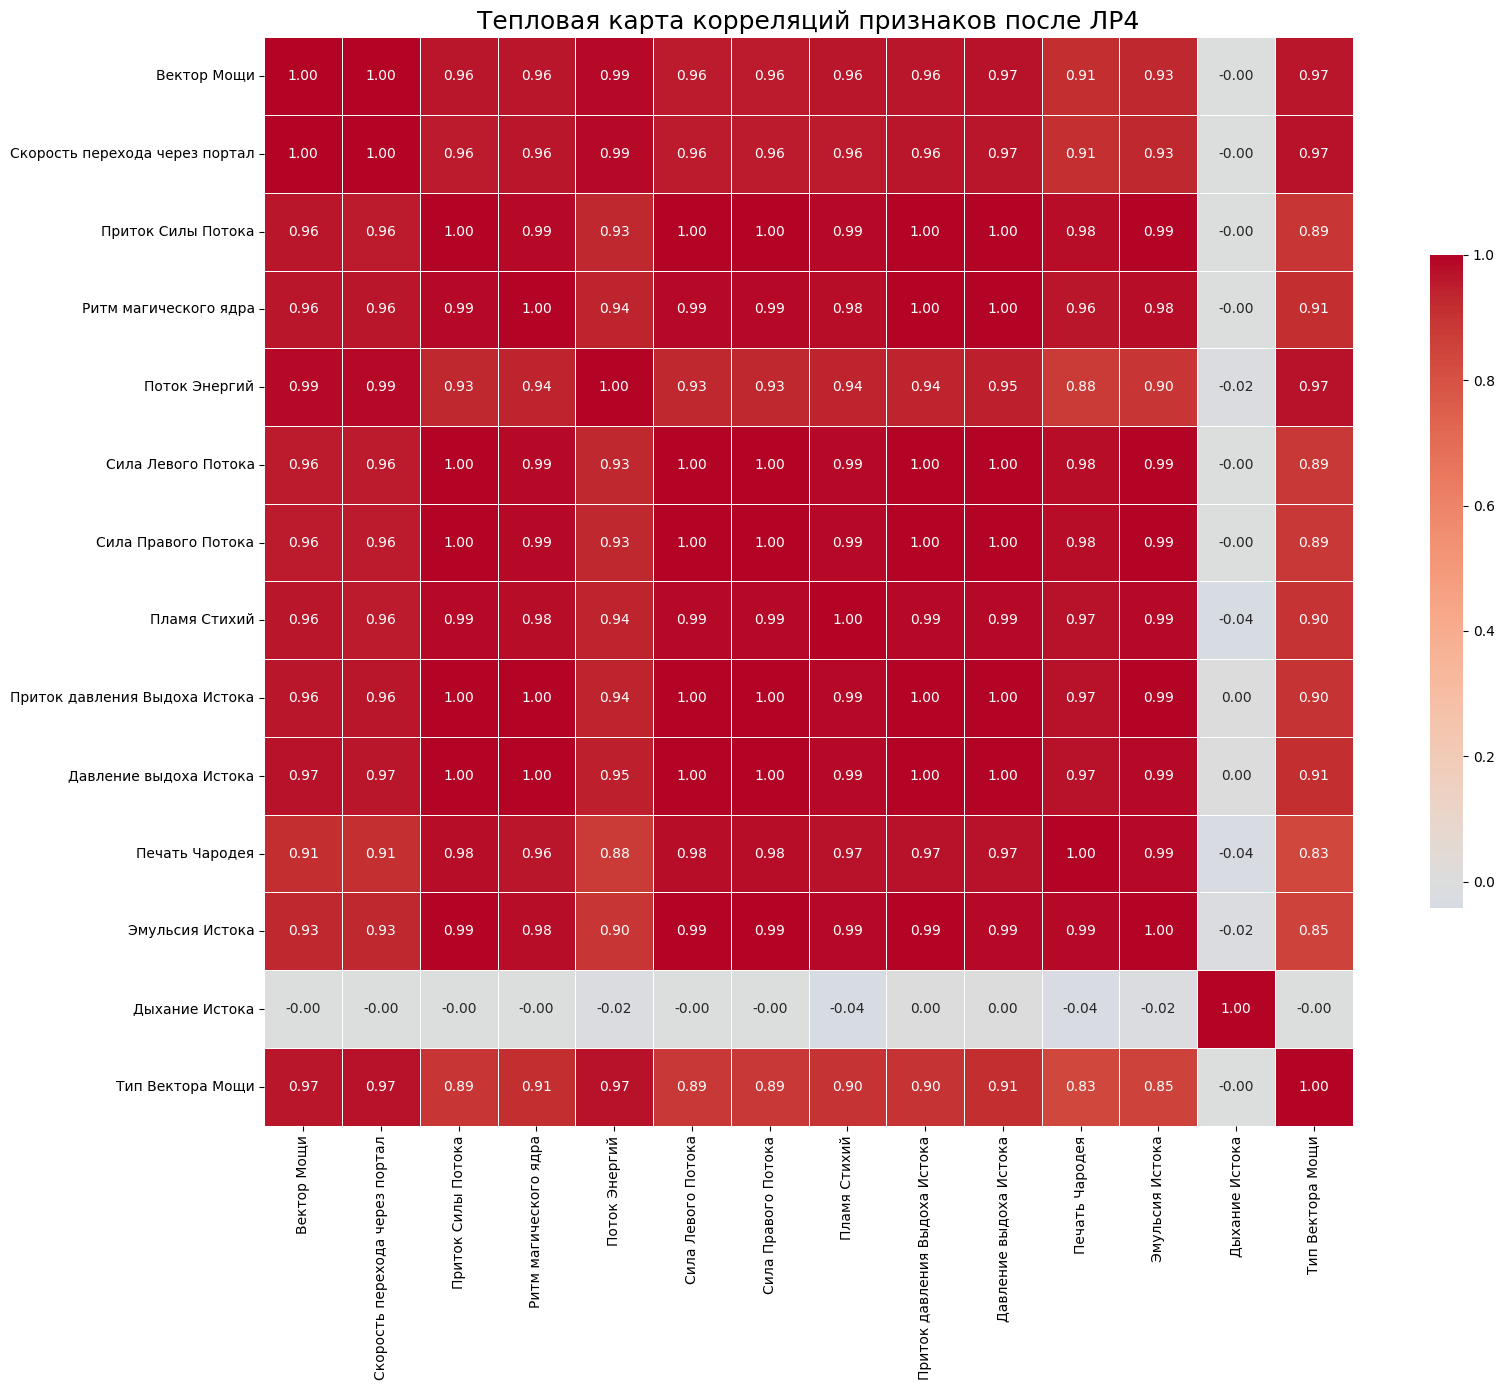

In [507]:
df_corr = X_train_no_anomalies.copy()

corr_matrix = df_corr.corr()

plt.figure(figsize=(18, 14))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .6}
)
plt.title("Тепловая карта корреляций признаков после ЛР4", fontsize=18)
plt.tight_layout()
plt.show()

Проанализировав тепловую карту можно сделать следующий вывод: матрица почти вся красная — корреляции >0.95 почти везде. Значит надо устранять мультиколлинеарность.

## 2.2. Исправление проблемы мультиколлинеарности в данных <a class="anchor" id="section_2_2"></a>

Самые сильные корреляции:

1. **Потоки:**

    -Сила Левого Потока  ~ Сила Правого Потока (1.00)

    -Обе они ~ Приток Силы Потока (0.999)

    -Все три ~ Печать Чародея, Эмульсия, Давления, Ритм ядра …

    Это огромный кластер.

    **Из формулы:**

    -P_потоки = СилаЛевого + СилаПравого

    -P_все_потоки = СилаЛевого + СилаПравого + ПритокСилы

    => Это даёт возможность заменить три коррелирующих признака двумя осмысленными.

2. **Ядро:**

    -Ритм магического ядра ~ Приток Силы Потока (0.989)
    
    -Оба ~ почти ко всем остальным

    **Формула:**

    -P_ядро = Ритм × Приток

    Это может заменить исходную пару.

3. **Давления:**

    -Приток давления Выдоха Истока ~ Давление выдоха Истока (0.999)

    **Формула:**

    -P_давление = Приток давления + Давление выдоха

4. **Температурные показатели:**
    
    -Пламя Стихий ~ многие показатели потоков (0.98–0.99)

    **Формула:**

    -P_магическая = Эмульсия × P_давление × |Пламя – Температура|

    Но мы избавились от признака “Температура вдоха Истока”, поэтому эту формулу мы не применяем.

5. **Почти некоррелирующий**

    -Дыхание Истока — единственный независимый признак (корреляции ≈ 0)

    Его оставляем.

Мы создаём:

Новые признаки:

1.	Общая Мощность Потоков = Сила Левого Потока + Сила Правого Потока

2.	Совокупная Сила Всех Потоков = Общая Мощность Потоков + Приток Силы Потока

3.	Общая Сила Ядра = Ритм магического ядра × Приток Силы Потока

4.	Общее Давление На Выходе = Приток давления + Давление выдоха

5.	Магическая Производительность = Скорость перехода через портал / Эмульсия Истока

6.	Эффективность Ядра = Общая Сила Ядра / Эмульсия Истока

(из формул прикладной области)

Признаки, которые можно удалить без потери информации

После замены:

Удаляем:
Сила Левого Потока

Сила Правого Потока

Приток Силы Потока

Приток давления

Давление выдоха

Ритм магического ядра

Эти признаки полностью «поглощены» новыми расчетными.

Признаки, которые обязательно оставляем:

Вектор Мощи

Скорость перехода через портал

Поток Энергий

Пламя Стихий

Печать Чародея

Эмульсия Истока

Дыхание Истока (независимый)

Тип Вектора Мощи (категориальный)

Сначала изменим признаки на обучающей выборке

In [508]:
df = X_train_no_anomalies.copy()

df['Общая Мощность Потоков'] = df['Сила Левого Потока'] + df['Сила Правого Потока']
df['Совокупная Сила Всех Потоков'] = df['Общая Мощность Потоков'] + df['Приток Силы Потока']

df['Общая Сила Ядра'] = df['Ритм магического ядра'] * df['Приток Силы Потока']

df['Общее Давление На Выходе'] = df['Приток давления Выдоха Истока'] + df['Давление выдоха Истока']

df['Магическая Производительность'] = df['Скорость перехода через портал'] / df['Эмульсия Истока']

df['Эффективность Ядра'] = df['Общая Сила Ядра'] / df['Эмульсия Истока']

to_drop = [
    'Сила Левого Потока',
    'Сила Правого Потока',
    'Приток Силы Потока',
    'Ритм магического ядра',
    'Приток давления Выдоха Истока',
    'Давление выдоха Истока'
]

df = df.drop(columns=to_drop)

df.head()

,Вектор Мощи,Скорость перехода через портал,Поток Энергий,Пламя Стихий,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Общая Мощность Потоков,Совокупная Сила Всех Потоков,Общая Сила Ядра,Общее Давление На Выходе,Магическая Производительность,Эффективность Ядра
3685,5.140,7.71660,8497.497,704.972,24.951,0.494,0.965,2.0,350.556,21985.465,4.359787e+06,13.082,15.620648,8.825480e+06
5886,1.138,1.54332,6622.351,545.800,26.222,0.194,0.975,0.0,12.540,2719.238,3.761400e+05,7.634,7.955258,1.938866e+06
6108,7.148,10.80324,9120.644,835.034,44.789,0.887,0.976,3.0,664.550,39662.798,1.093685e+07,18.710,12.179526,1.233015e+07
7713,1.138,1.54332,6697.636,620.925,0.000,0.278,0.982,0.0,18.750,6781.756,9.791635e+05,8.400,5.551511,3.522171e+06
3499,8.206,12.34656,9319.460,917.854,59.577,1.179,0.964,3.0,876.212,51870.279,1.648763e+07,21.746,10.472061,1.398442e+07


Теперь изменим признаки на тестовой выборке

In [509]:
X_test_fe = X_test_knn.copy()

X_test_fe['Общая Мощность Потоков'] = X_test_fe['Сила Левого Потока'] + X_test_fe['Сила Правого Потока']
X_test_fe['Совокупная Сила Всех Потоков'] = X_test_fe['Общая Мощность Потоков'] + X_test_fe['Приток Силы Потока']

X_test_fe['Общая Сила Ядра'] = X_test_fe['Ритм магического ядра'] * X_test_fe['Приток Силы Потока']

X_test_fe['Общее Давление На Выходе'] = X_test_fe['Приток давления Выдоха Истока'] + X_test_fe['Давление выдоха Истока']

X_test_fe['Магическая Производительность'] = X_test_fe['Скорость перехода через портал'] / X_test_fe['Эмульсия Истока']

X_test_fe['Эффективность Ядра'] = X_test_fe['Общая Сила Ядра'] / X_test_fe['Эмульсия Истока']

to_drop_test = [
    'Сила Левого Потока',
    'Сила Правого Потока',
    'Приток Силы Потока',
    'Ритм магического ядра',
    'Приток давления Выдоха Истока',
    'Давление выдоха Истока'
]

X_test_fe = X_test_fe.drop(columns=to_drop_test)

Теперь построим тепловую карту корреляции получившихся признаков

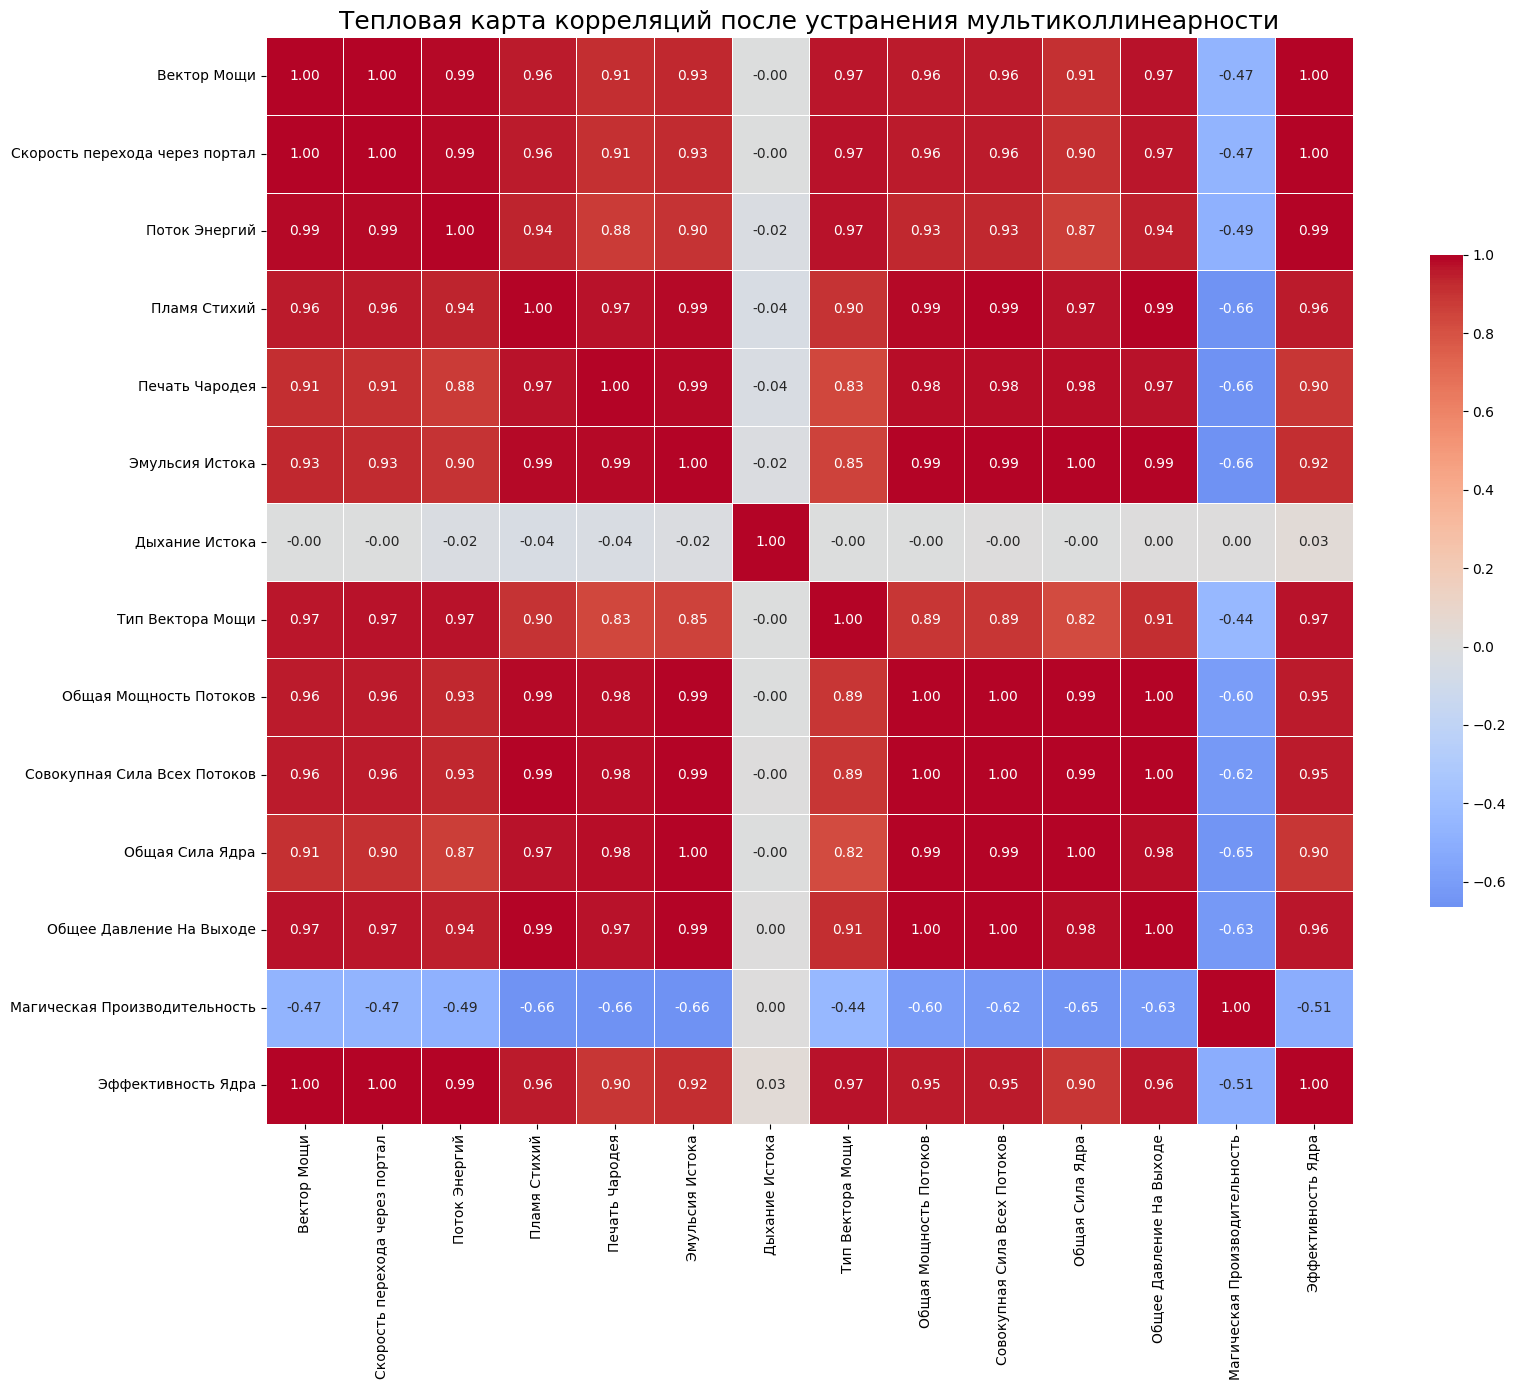

In [510]:
corr_matrix = df.corr()

plt.figure(figsize=(18, 14))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .6}
)
plt.title("Тепловая карта корреляций после устранения мультиколлинеарности", fontsize=18)
plt.tight_layout()
plt.show()

По итогам мы частично устранили мультиколлинеарность

## 2.3. Скалирование данных <a class="anchor" id="section_2_3"></a>

Исследуем проблему диспропорции значений признаков. Для этого воспользуемся методом DataFrame.describe(), чтобы проанализировать средние значения и среднеквадратические отклонения столбцов.

In [511]:
df.describe()

,Вектор Мощи,Скорость перехода через портал,Поток Энергий,Пламя Стихий,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Общая Мощность Потоков,Совокупная Сила Всех Потоков,Общая Сила Ядра,Общее Давление На Выходе,Магическая Производительность,Эффективность Ядра
count,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9.489000e+03,9489.000000,9489.000000,9.489000e+03
mean,5.133563,7.667091,8188.063367,732.942870,33.267436,0.654744,0.975068,1.653810,448.827318,27374.828915,7.743437e+06,14.558905,13.869121,8.726715e+06
std,2.617656,3.972391,1089.036056,172.331001,25.569783,0.501778,0.014652,1.156484,397.336579,22351.080489,8.389627e+06,6.371504,4.270310,4.392100e+06
min,1.138000,1.543320,6589.002000,442.364000,0.000000,0.068000,0.950000,0.000000,10.608000,267.547000,3.556916e+04,6.924000,4.566036,4.373923e+05
25%,3.144000,4.629960,7053.835000,589.509000,13.478000,0.246000,0.962000,1.000000,120.630000,8496.252000,1.216298e+06,8.831000,10.427838,4.905479e+06
50%,5.140000,7.716600,8480.022000,704.737000,25.204000,0.495000,0.975000,2.000000,350.526000,21980.419000,4.358750e+06,13.160000,13.637585,8.767421e+06
75%,7.148000,10.803240,9131.428000,832.209000,44.436000,0.880000,0.988000,3.000000,664.704000,39664.443000,1.093731e+07,18.614000,17.945581,1.269050e+07
max,9.300000,13.889880,9795.386000,1114.609000,92.476000,1.831000,1.000000,3.000000,1290.498000,74075.284000,2.714001e+07,27.683000,25.094634,1.592358e+07


In [512]:
X_test_fe.describe()

,Вектор Мощи,Скорость перехода через портал,Поток Энергий,Пламя Стихий,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Общая Мощность Потоков,Совокупная Сила Всех Потоков,Общая Сила Ядра,Общее Давление На Выходе,Магическая Производительность,Эффективность Ядра
count,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2.387000e+03,2387.000000,2387.000000,2.387000e+03
mean,5.204671,7.774014,8216.860093,737.837630,33.832884,0.667522,0.974752,1.687893,458.681060,27938.780427,7.939756e+06,14.725103,13.784042,8.834343e+06
std,2.613461,3.965694,1086.468500,172.941356,25.805099,0.505638,0.014665,1.142504,399.610288,22469.819514,8.466444e+06,6.406046,4.159914,4.385107e+06
min,1.138000,1.543320,6589.002000,446.683000,0.000000,0.070000,0.950000,0.000000,10.636000,304.385000,4.079265e+04,6.929000,4.634595,4.755529e+05
25%,3.144000,4.629960,7069.377000,590.522000,13.133500,0.246500,0.962000,1.000000,120.650000,8497.117500,1.216424e+06,8.849000,10.441067,4.947654e+06
50%,5.140000,7.716600,8484.349000,709.833000,25.419000,0.500000,0.974000,2.000000,350.544000,21982.336000,4.359108e+06,13.214000,13.657699,8.804181e+06
75%,7.148000,10.803240,9133.623500,834.780500,44.654000,0.884000,0.987000,3.000000,664.743000,39666.179500,1.093774e+07,18.638500,17.816141,1.274586e+07
max,9.300000,13.889880,9796.052000,1115.797000,92.556000,1.832000,1.000000,3.000000,1290.426000,74072.670000,2.713878e+07,27.700000,24.497143,1.588642e+07


Мы вывели df.describe(), и на основе этого анализа видно, что диапазоны значений признаков сильно различаются: одни — от 1 до 10, другие — миллионы.

Чтобы наглядно увидеть проблему диспропорции, можно построить гистограммы для всех признаков на одном графике:

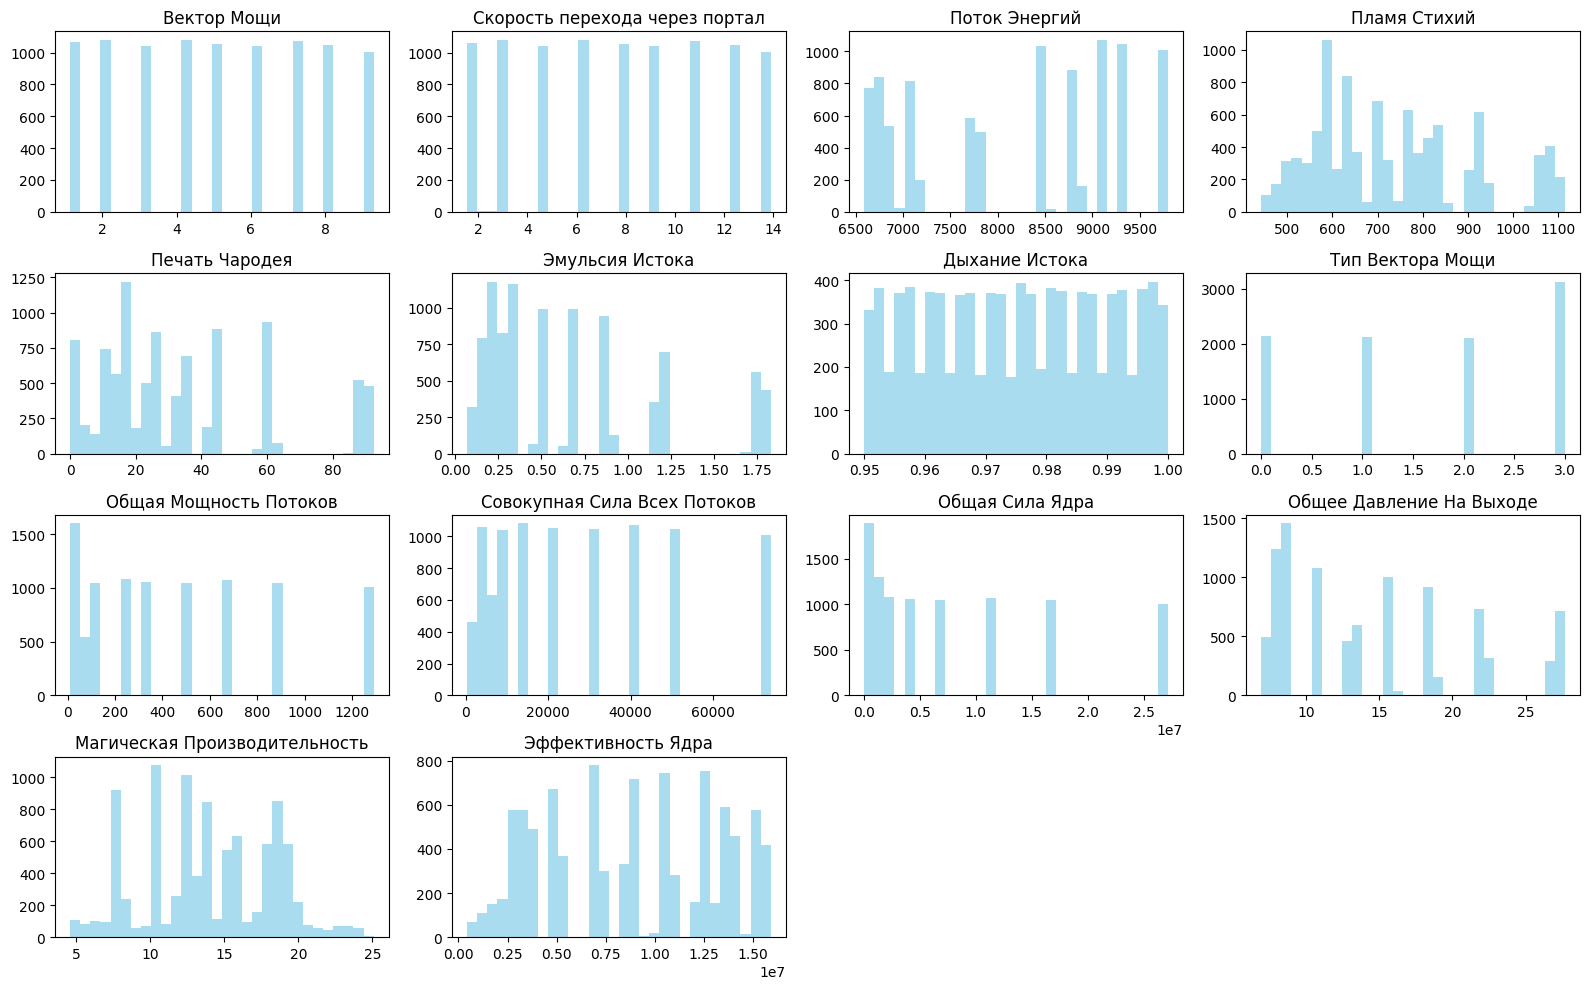

In [513]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    plt.hist(df[col], bins=30, color='skyblue', alpha=0.7)
    plt.title(col)
plt.tight_layout()
plt.show()

Эти гистограммы подтверждают вывод из describe(): у части признаков значения сконцентрированы в узком диапазоне, а у других — сильно разнесены.

**Из полученных данных делаем вывод, что требуется применить скалирование датасету**

Чтобы модели чувствительно работали с разными масштабами, применим три подхода к масштабированию:

1.	StandardScaler — стандартизация (среднее 0, стандартное отклонение 1)

2.	MinMaxScaler — приведение значений к диапазону [0, 1]

3.	RobustScaler — робастное масштабирование, менее чувствительное к выбросам

In [514]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler


X_train_fe = df.copy()

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

scaled_X_train_fe = {}

for name, scaler in scalers.items():
    scaled_array = scaler.fit_transform(X_train_fe)
    scaled_X_train_fe[name] = pd.DataFrame(scaled_array, columns=X_train_fe.columns)

scaled_X_test_fe = {}

for name, scaler in scalers.items():
    scaled_array = scaler.transform(X_test_fe)
    scaled_X_test_fe[name] = pd.DataFrame(scaled_array, columns=X_test_fe.columns)

И визуализируем при помощи гистограмм

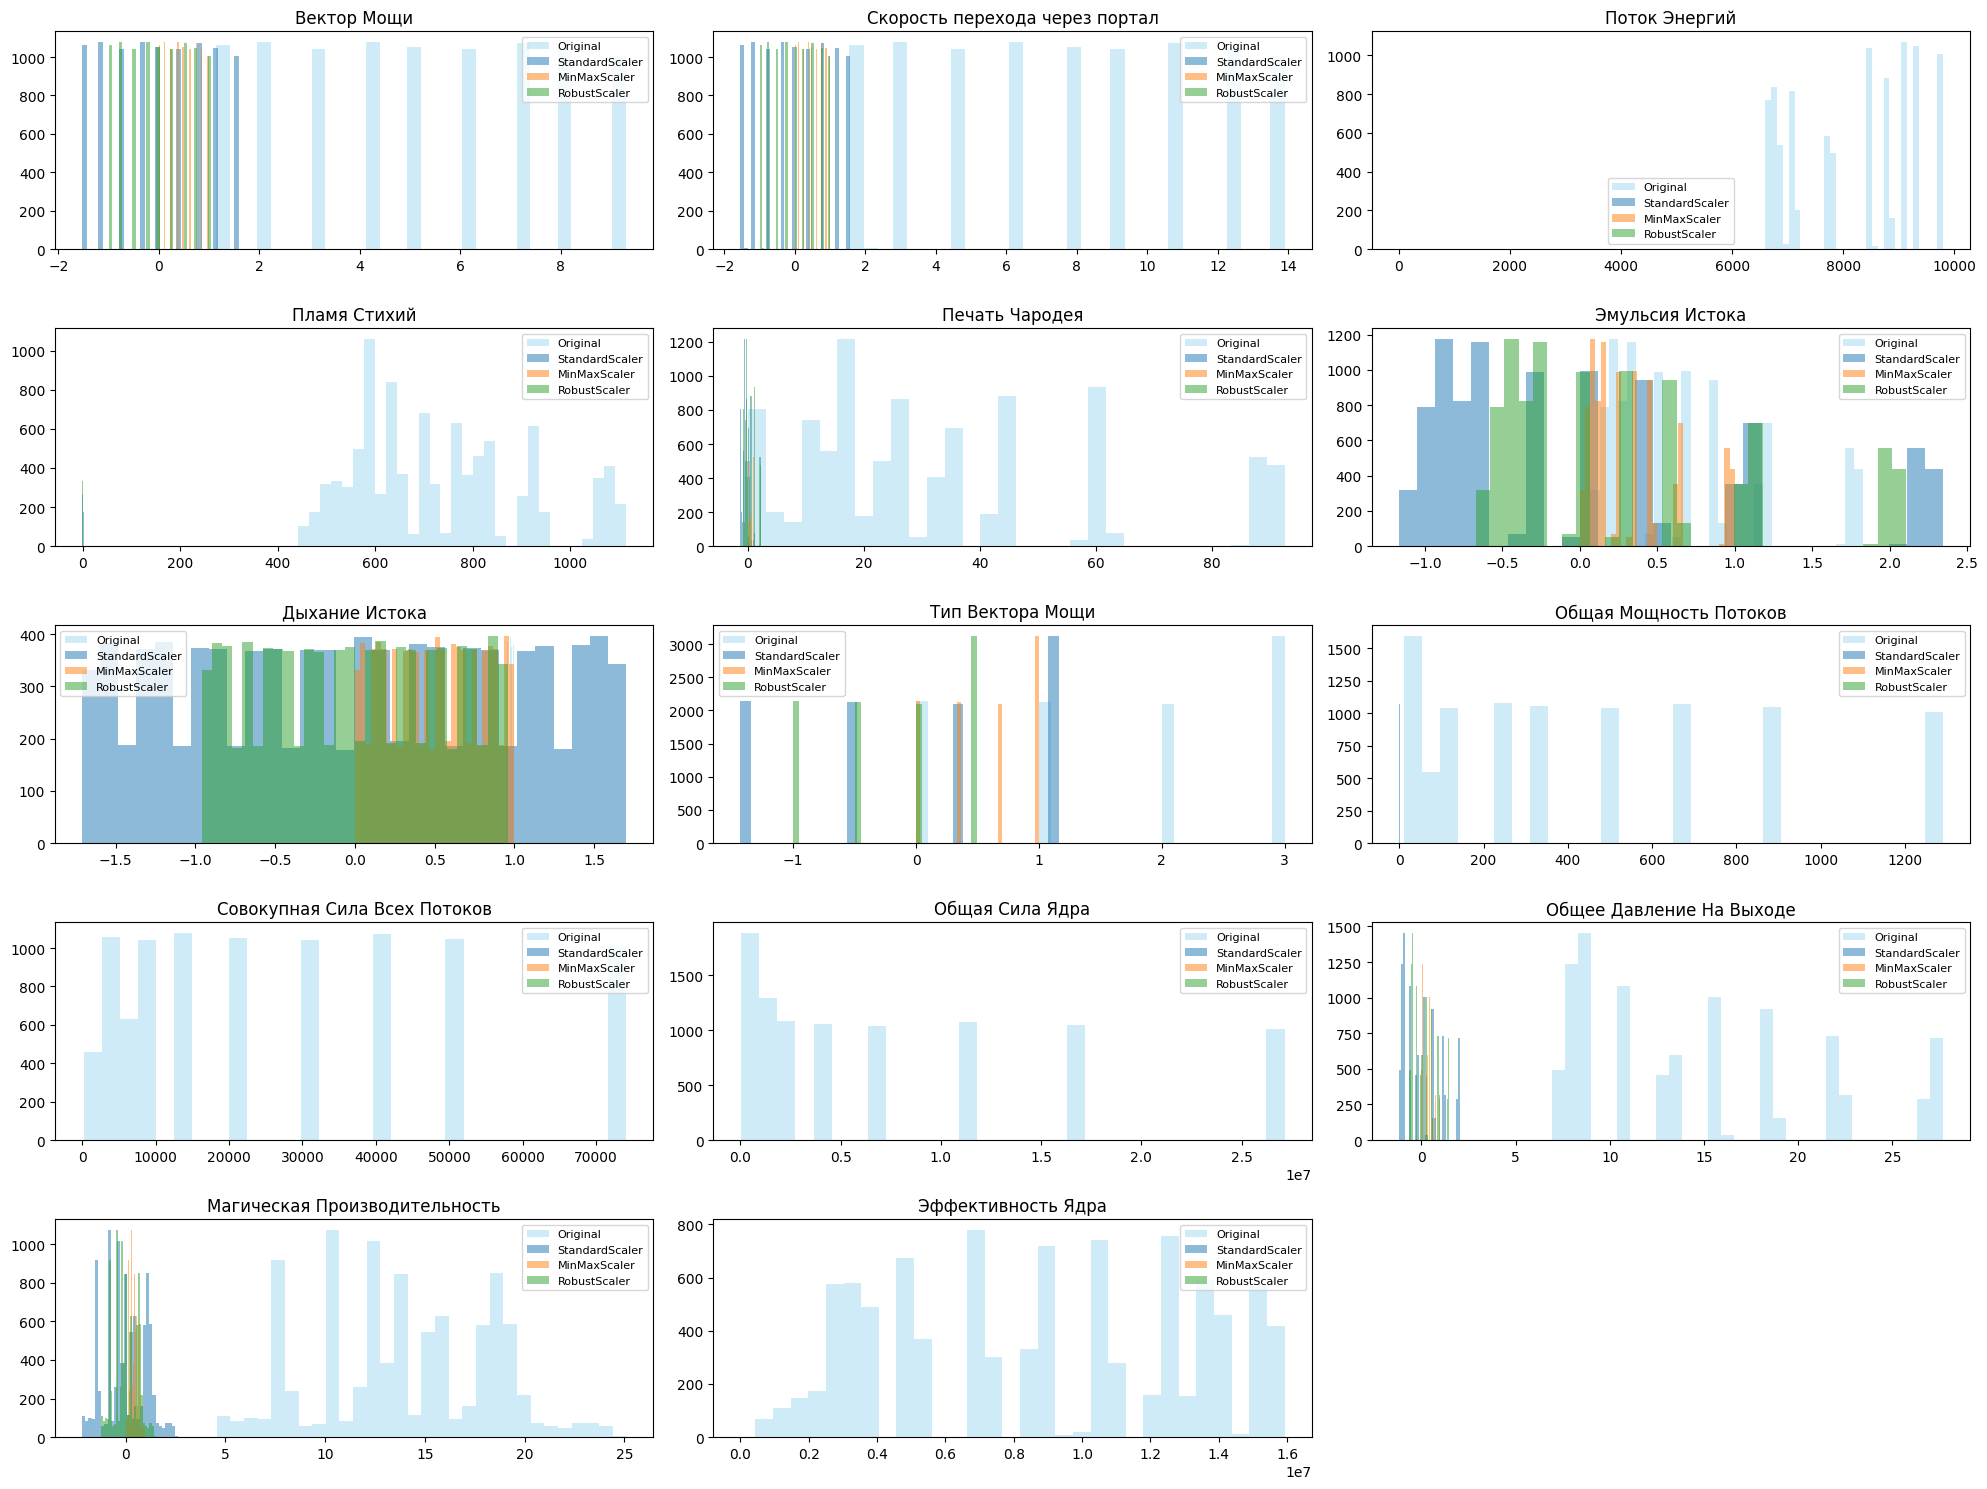

In [515]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(X_train_fe.columns, 1):
    plt.subplot(5, 3, i)
    plt.hist(X_train_fe[col], bins=30, alpha=0.4, label='Original', color='skyblue')
    for name, scaled_df in scaled_X_train_fe.items():
        plt.hist(scaled_df[col], bins=30, alpha=0.5, label=name)
    plt.title(col)
    plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

На не очень больших величинах видно, что наши скейлеры действительно работают

Для большей наглядности выведем сравнение разных скейлеров между собой, без исходных данных до скалирования

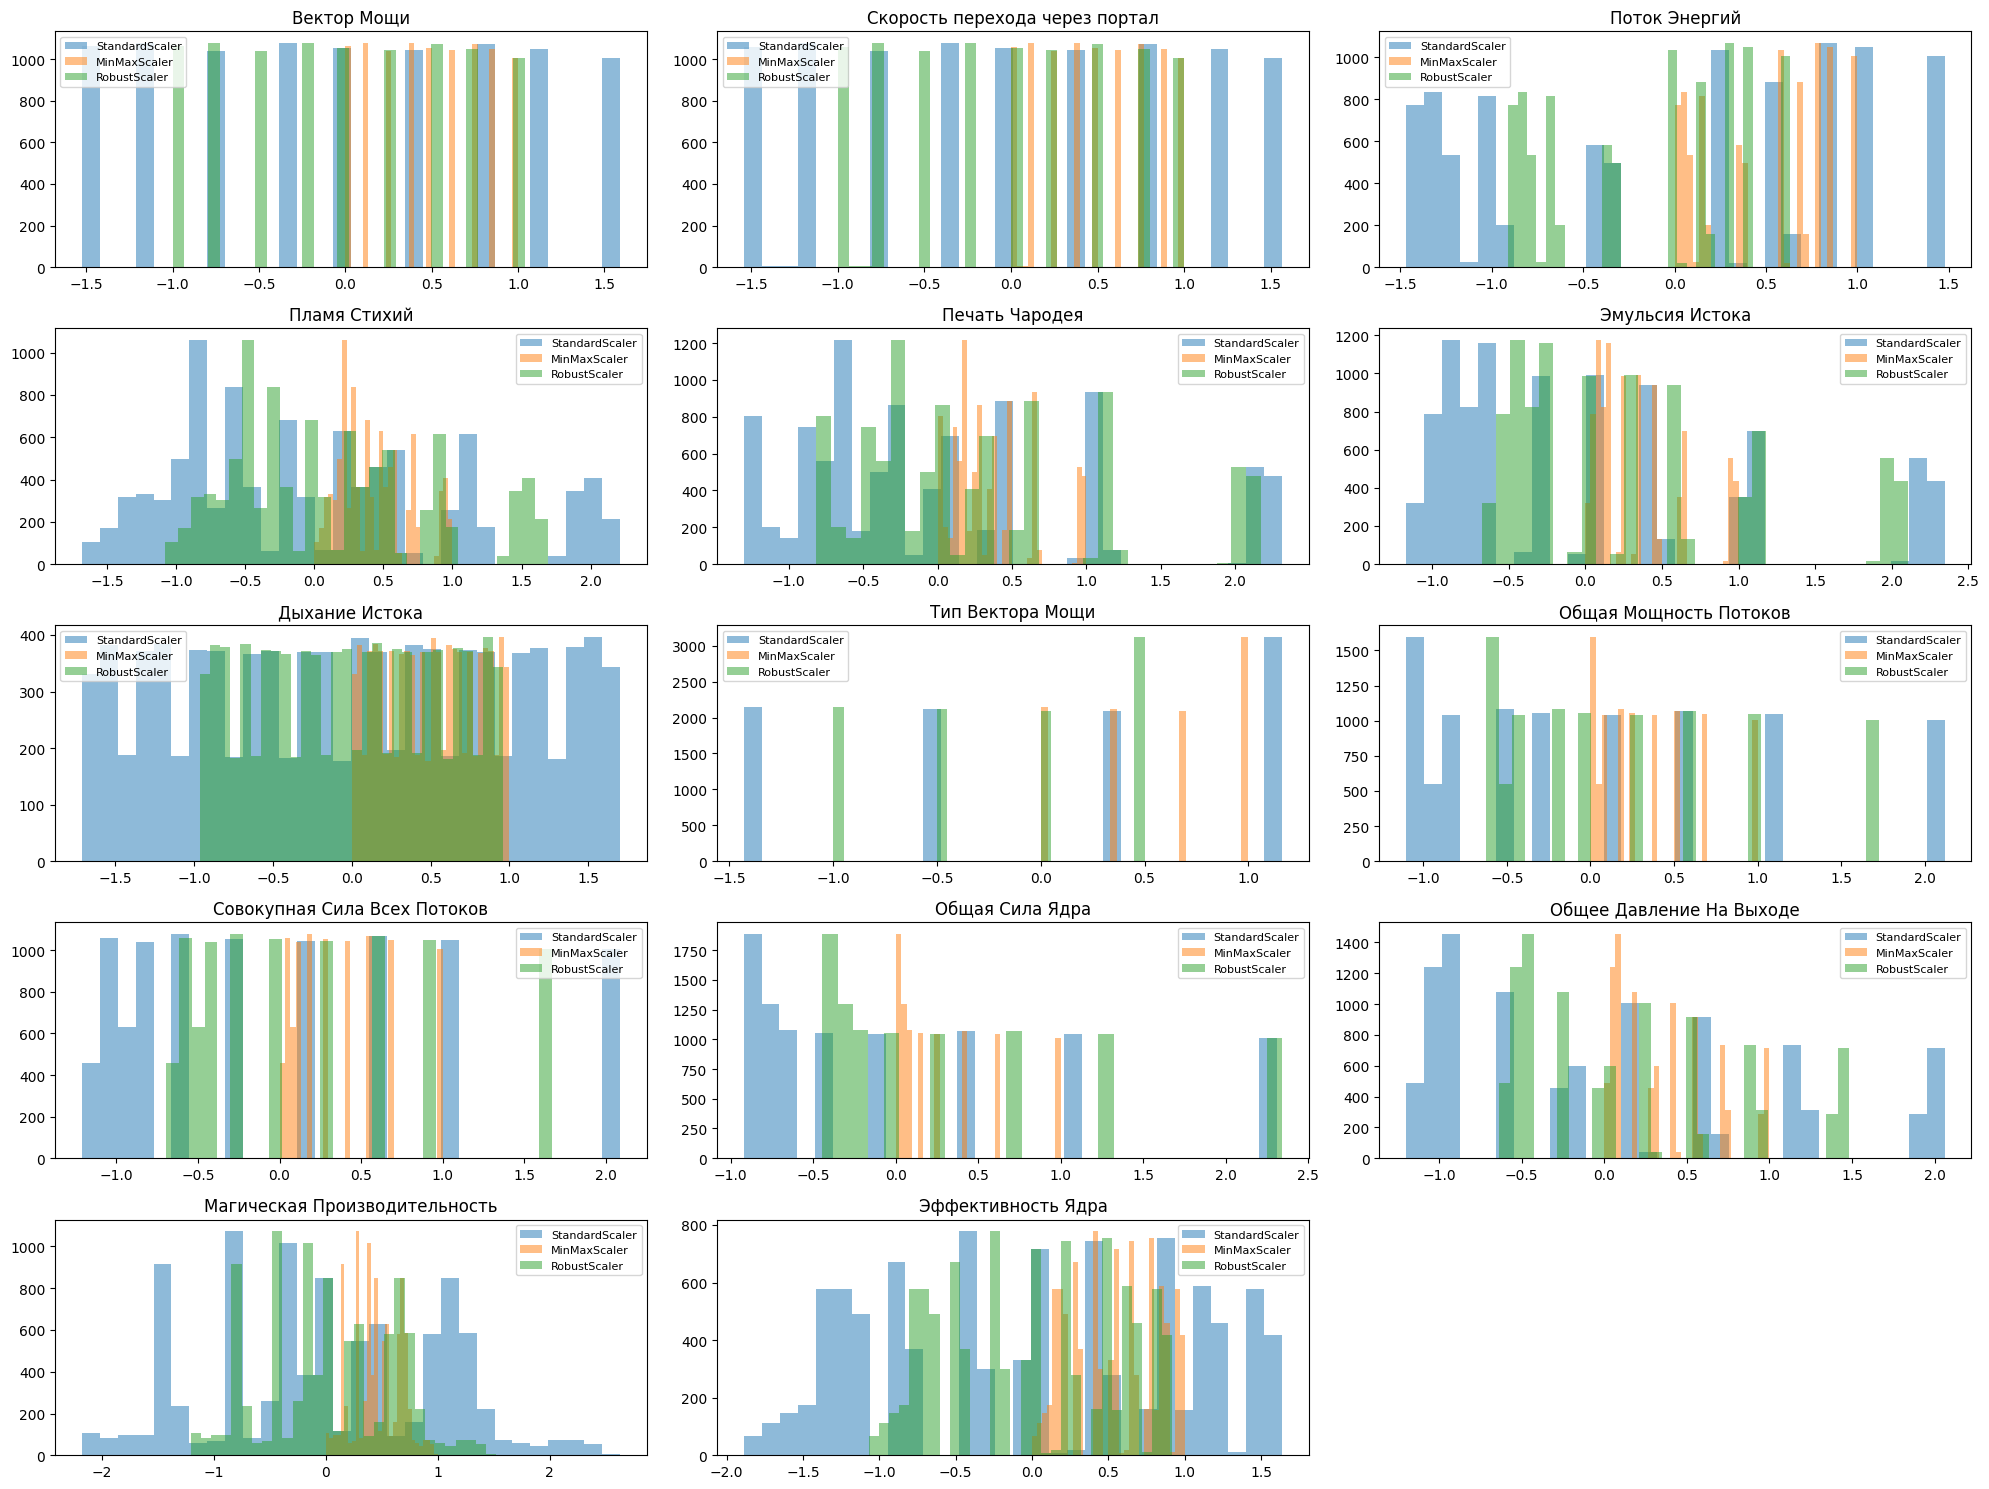

In [516]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(X_train_fe.columns, 1):
    plt.subplot(5, 3, i)
    for name, scaled_df in scaled_X_train_fe.items():
        plt.hist(scaled_df[col], bins=30, alpha=0.5, label=name)
    plt.title(col)
    plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

Как видим, все скейлеры отработали примерно одинаково и масштабировали наши данные, заключив их в дипазон примерно от -2 до 2

## 2.4. Подведение итогов раздела 2 <a class="anchor" id="section_2_4"></a>

В ходе второго пункта работы мы провели корреляционный анализ признаков, частично устранили проблему мультиколлинеарности и скалировали наши данных. Таким образом, мы подготовили наши данные для дальнейшей работы.

# 3. Выбор моделей ML и метрик <a class="anchor" id="chapter3"></a>

Для начала построим точечные графики для каждого признака против целевого и тепловую карту корреляций только с целевой переменной.

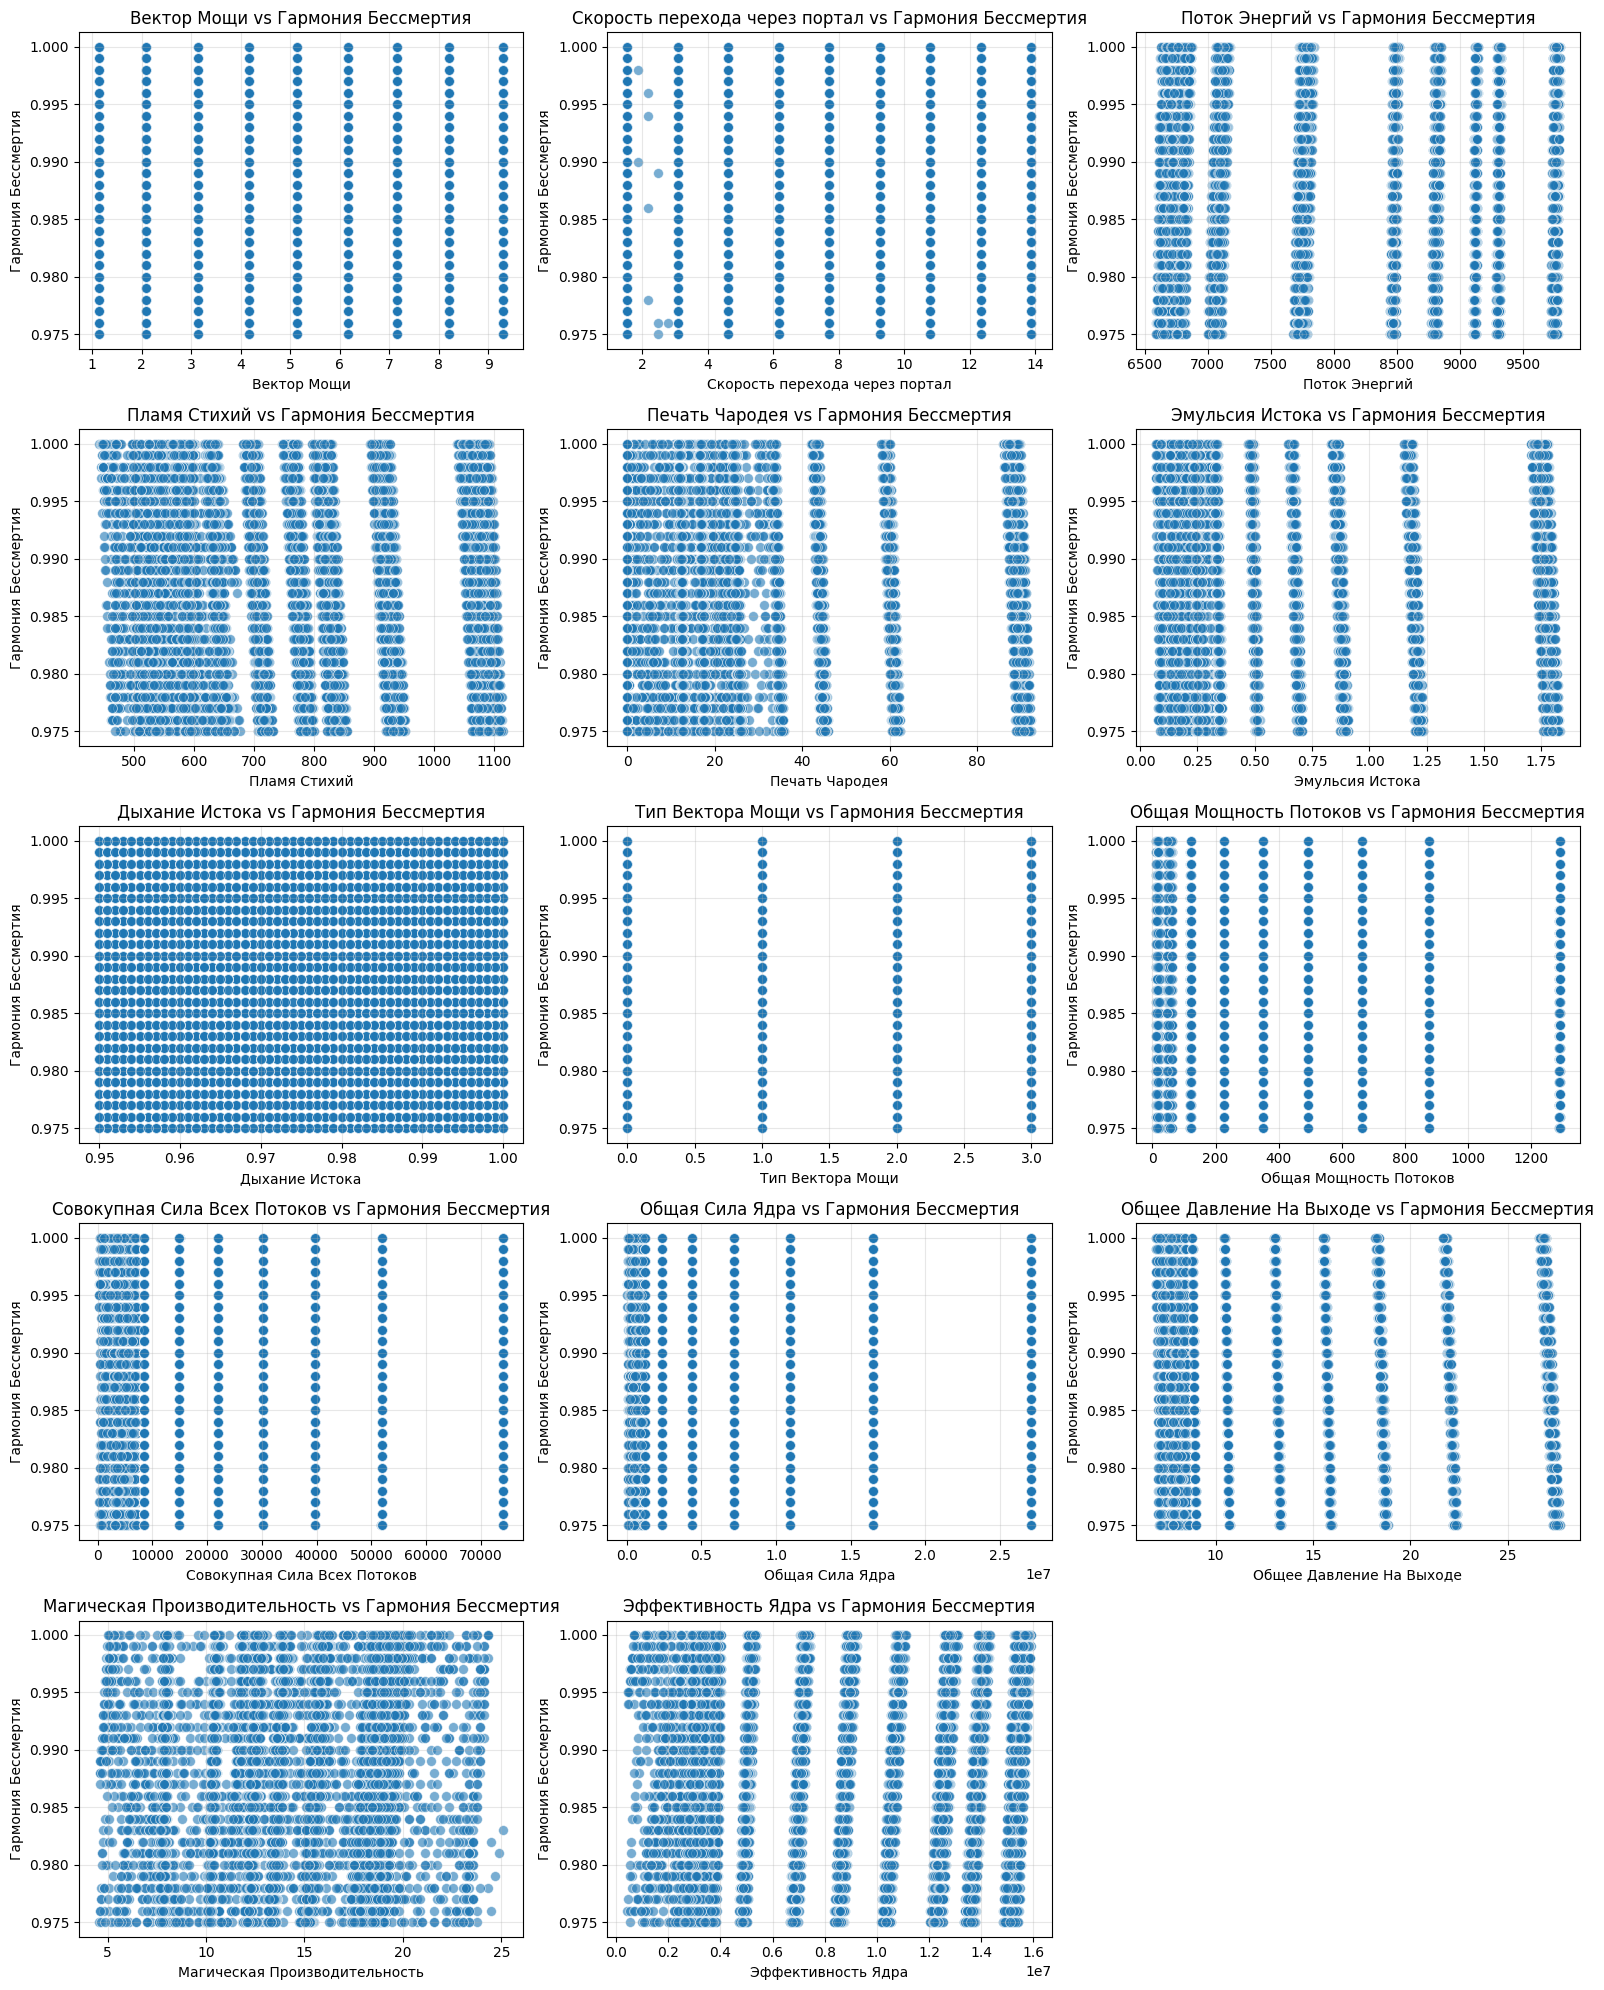

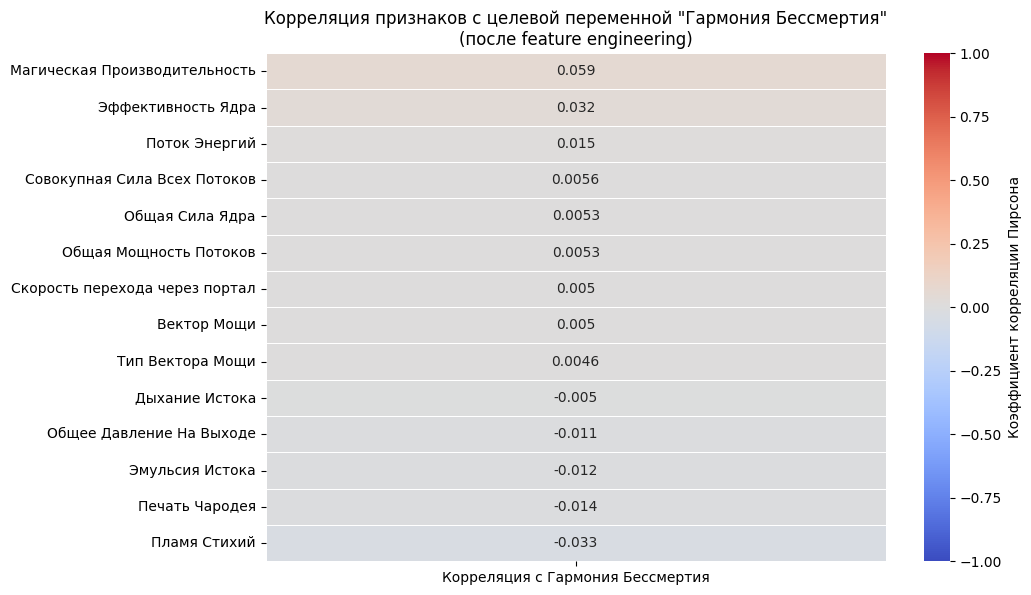

In [517]:
data = X_train_fe.copy()
data['Гармония Бессмертия'] = y_train_no_anomalies

numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
features_only = [f for f in numeric_features if f != 'Гармония Бессмертия']

n_cols = 3
n_rows = (len(features_only) + n_cols - 1) // n_cols

plt.figure(figsize=(16, 4 * n_rows))
for i, feature in enumerate(features_only, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(
        data=data,
        x=feature,
        y='Гармония Бессмертия',
        alpha=0.6,
        s=50
    )
    plt.title(f'{feature} vs Гармония Бессмертия')
    plt.xlabel(feature)
    plt.ylabel('Гармония Бессмертия')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

correlations = data[features_only + ['Гармония Бессмертия']].corr()['Гармония Бессмертия'].drop('Гармония Бессмертия')

correlations_sorted = correlations.sort_values(ascending=False)

plt.figure(figsize=(10, len(features_only) * 0.4 + 1))
sns.heatmap(
    correlations_sorted.to_frame(name='Корреляция с Гармония Бессмертия'),
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'label': 'Коэффициент корреляции Пирсона'}
)

plt.title('Корреляция признаков с целевой переменной "Гармония Бессмертия"\n(после feature engineering)')
plt.yticks(rotation=0)
plt.show()

После построения точечных графиков (scatter plots) и тепловой карты корреляций (на данных после feature engineering) мы наблюдаем следующее:

- **Линейных зависимостей** между входными признаками и целевой переменной **«Гармония Бессмертия»** практически нет  
- **Коэффициенты корреляции Пирсона** между признаками и целевой переменной близки к нулю

Это говорит о том, что:
- линейные модели (например, линейная регрессия) скорее всего покажут низкую точность  
- нам нужны **нелинейные модели**, способные улавливать сложные зависимости и взаимодействия между признаками

**Выбор моделей ML**

Для решения задачи регрессии (предсказание непрерывной величины «Гармония Бессмертия») выбраны три модели:

1. **Random Forest Regressor**  
2. **Gradient Boosting Regressor (XGBoost)**  
3. **CatBoost Regressor**

- **Random Forest Regressor**  
  - Отличная базовая нелинейная модель на основе ансамбля деревьев  
  - Хорошо справляется с нелинейными зависимостями  
  - Устойчива к выбросам и переобучению (благодаря усреднению)  
  - Позволяет оценить важность признаков (feature importance)  

- **Gradient Boosting Regressor (XGBoost)**  
  - Одна из самых мощных моделей для табличных данных  
  - Последовательно строит деревья, исправляя ошибки предыдущих  
  - Очень высокая точность на сложных зависимостях  
  - Быстрая работа, встроенная регуляризация, обработка пропусков  

- **CatBoost Regressor**  
  - Специально разработана для данных с категориальными признаками 
  - Автоматически обрабатывает категориальные переменные (если они остались)  
  - Отличная устойчивость к переобучению благодаря ordered boosting  
  - Часто показывает лучшие результаты на сильно нелинейных данных

Все три модели — **ансамблевые**, основанные на деревьях решений, что идеально подходит для нашей задачи с отсутствием линейных зависимостей.

1. **Random Forest Regressor**  
   - Строит множество **независимых** деревьев решений  
   - Каждое дерево обучается на случайной подвыборке данных и случайном подмножестве признаков  
   - Предсказание — **среднее** (или медиана) предсказаний всех деревьев  
   - Снижает дисперсию и переобучение за счёт усреднения  

2. **Gradient Boosting Regressor (XGBoost)**  
   - Строит деревья **последовательно**  
   - Каждое следующее дерево обучается на **остатках ошибок** предыдущих (градиенте функции потерь)  
   - Добавляет предсказания с коэффициентом обучения (learning rate)  
   - Итоговое предсказание — сумма всех деревьев  

3. **CatBoost Regressor**  
   - Вариант градиентного бустинга с **ordered boosting** (обучает на упорядоченных данных)  
   - Уменьшает переобучение за счёт симметричного дерева и специальной обработки категорий  
   - Каждое следующее дерево корректирует ошибки предыдущих, как в XGBoost, но с меньшим риском переобучения

**Выбор метрик**

Мы решаем задачу **регрессии**: предсказываем непрерывную величину — коэффициент **«Гармония Бессмертия»**, который отражает состояние магического ядра портала.  

Для оценки качества регрессионных моделей выбраны следующие метрики:

1. **MAE (Mean Absolute Error)**  
   - Средняя абсолютная ошибка в тех же единицах, что и целевая переменная  
   - Легко интерпретируема: «в среднем модель ошибается на X единиц»

2. **RMSE (Root Mean Squared Error)**  
   - Корень из средней квадратичной ошибки  
   - Штрафует большие ошибки сильнее, чем MAE

3. **MAPE (Mean Absolute Percentage Error)**  
   - Средняя абсолютная ошибка в процентах  
   - Удобна, если масштаб значений «Гармония Бессмертия» сильно варьируется

4. **R² (Коэффициент детерминации)**  
   - Доля объяснённой дисперсии целевой переменной  
   - Показывает, насколько модель лучше, чем простое предсказание средним значением

Основная (целевая) метрика для оптимизации гиперпараметров (Optuna)
**Выбрана: MAE (Mean Absolute Error)**

1. **Интерпретируемость**  
   MAE даёт понятную величину ошибки в единицах целевой переменной.  
   Для «Гармонии Бессмертия» это означает: «в среднем модель ошибается на X единиц стабильности», что прямо связано с задачей (нужно вовремя заметить снижение стабильности).

2. **Устойчивость к выбросам**  
   В отличие от RMSE, MAE **не усиливает** влияние больших ошибок.  
   Если в данных есть редкие, но очень низкие значения «Гармонии» (критические состояния), MAE не будет слишком сильно наказывать модель за ошибки на них.

3. **Баланс между большими и малыми ошибками**  
   RMSE больше ориентирован на минимизацию крупных ошибок, но может жертвовать точностью в большинстве случаев.  
   MAE обеспечивает равномерную точность по всему диапазону значений — это важно, когда **все** снижения стабильности критичны.

4. **Соответствие бизнес-логике задачи**  
   В контексте магического портала важнее **не пропустить** даже небольшое снижение стабильности, чем идеально предсказывать очень высокие значения.  
   MAE лучше отражает среднюю точность предсказания, что критично для своевременного вмешательства.

Формулы выбранных метрик

1. **MAE (Mean Absolute Error)**  
   $$
   \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
   $$

2. **RMSE (Root Mean Squared Error)**  
   $$
   \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
   $$

3. **MAPE (Mean Absolute Percentage Error)**  
   $$
   \text{MAPE} = \frac{100}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|
   \quad (\text{в \%})
   $$

4. **R² (Коэффициент детерминации)**  
   $$
   R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
   $$
   где $\bar{y}$ — среднее значение целевой переменной.

**Импорт моделей из пула**

In [518]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0)
}

print("Модели загружены и готовы к использованию:")
for name, model in models.items():
    print(f"- {name}: {model.__class__.__name__}")

Модели загружены и готовы к использованию:
- RandomForest: RandomForestRegressor
- XGBoost: XGBRegressor
- CatBoost: CatBoostRegressor


**Формирование сеток гиперпараметров**

Для удобства и читаемости создаём **три отдельных словаря** гиперпараметров:  
- `rf_params` — для Random Forest  
- `xgb_params` — для XGBoost  
- `cat_params` — для CatBoost  

Каждый словарь содержит тип параметра и диапазон/список значений.

In [ ]:
rf_params = {
    'n_estimators': ('int', [100, 300]),
    'max_depth': ('int', [5, 10, 15]),
    'min_samples_split': ('int', [2, 5, 10]),
    'max_features': ('cat', ['sqrt', 'log2'])
}

xgb_params = {
    'n_estimators': ('int', [100, 300]),
    'learning_rate': ('float', [0.05, 0.1, 0.2]),
    'max_depth': ('int', [3, 6, 9]),
    'subsample': ('float', [0.8, 1.0])
}

cat_params = {
    'iterations': ('int', [100, 300]),
    'learning_rate': ('float', [0.05, 0.1, 0.2]),
    'depth': ('int', [4, 6, 8]),
    'l2_leaf_reg': ('float', [3, 7])
}

**Импорт метрик из пула**

In [520]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)

metrics = {
    'MAE': mean_absolute_error,
    'RMSE': lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False),
    'R²': r2_score,
    'MAPE': mean_absolute_percentage_error
}

print("Метрики импортированы:")
for name in metrics:
    print(f"- {name}")

Метрики импортированы:
- MAE
- RMSE
- R²
- MAPE


**Обёртка Optuna для подбора гиперпараметров**

Создаём универсальную функцию-обёртку, которая:
- генерирует objective-функцию для Optuna на основе словаря параметров  
- запускает оптимизацию  
- возвращает лучшие параметры и значение метрики

Оптимизируем по **MAE** (основная метрика задачи).

In [521]:
import optuna
from sklearn.model_selection import cross_val_score
from catboost import Pool, cv

def optimize_with_optuna(
    estimator_class,
    param_grid: dict,
    X_train,
    y_train,
    n_trials: int = 50,
    cv_folds: int = 5,
    random_state: int = 42
):
    
    def objective(trial):
        params = {}
        for param_name, (ptype, values) in param_grid.items():
            if ptype == 'int':
                params[param_name] = trial.suggest_int(param_name, min(values), max(values))
            elif ptype == 'float':
                params[param_name] = trial.suggest_float(param_name, min(values), max(values), log=True)
            elif ptype == 'cat':
                params[param_name] = trial.suggest_categorical(param_name, values)
        
        if estimator_class == CatBoostRegressor:
            params['random_seed'] = random_state
            params['loss_function'] = 'MAE'
            params['eval_metric'] = 'MAE'
        
        if estimator_class == CatBoostRegressor:
            model = estimator_class(**params, verbose=False)
        else:
            model = estimator_class(**params, random_state=random_state)
        
        if estimator_class == CatBoostRegressor:
            train_pool = Pool(data=X_train, label=y_train)
            cv_results = cv(
                pool=train_pool,
                params=params,
                fold_count=cv_folds,
                shuffle=True,
                verbose=False,
                plot=False
            )
            return cv_results['test-MAE-mean'].mean()
        else:
            scores = cross_val_score(
                model,
                X_train,
                y_train,
                cv=cv_folds,
                scoring='neg_mean_absolute_error',
                n_jobs=-1
            )
            return -scores.mean()
    
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)
    
    best_params = study.best_params
    best_mae = study.best_value
    
    print(f"Лучший MAE: {best_mae:.4f}")
    print(f"Лучшие параметры: {best_params}")
    
    return best_params, best_mae


def calculate_metrics(model_name: str, y_true, y_pred):
    return {
        'Model': model_name,
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred) * 100,
        'R²': r2_score(y_true, y_pred)
    }


metrics_results = {}

# 4. Обучение моделей ML и подбор гиперпараметров <a class="anchor" id="chapter4"></a>

In [ ]:
import numpy as np

y_train_1d = y_train_no_anomalies.ravel() if hasattr(y_train_no_anomalies, 'ravel') else y_train_no_anomalies.values.ravel()
y_test_1d = y_test.ravel() if hasattr(y_test, 'ravel') else y_test.values.ravel()

print("y_train преобразован в 1D:", y_train_1d.shape)
print("y_test преобразован в 1D:", y_test_1d.shape)

scaler_versions = ['StandardScaler', 'MinMaxScaler', 'RobustScaler']

model_configs = {
    'RandomForest': {'class': RandomForestRegressor, 'params': rf_params},
    'XGBoost': {'class': xgb.XGBRegressor, 'params': xgb_params},
    'CatBoost': {'class': CatBoostRegressor, 'params': cat_params}
}

import pandas as pd

best_params_dict = {}
metrics_results = {}

for scaler_name in scaler_versions:
    X_train_scaled = scaled_X_train_fe[scaler_name]
    X_test_scaled = scaled_X_test_fe[scaler_name]
    
    for model_name, config in model_configs.items():
        key = f"{model_name}_{scaler_name}"
        
        print(f"\n--- {model_name} ({scaler_name}) ---")
        
        best_params, best_mae = optimize_with_optuna(
            estimator_class=config['class'],
            param_grid=config['params'],
            X_train=X_train_scaled,
            y_train=y_train_1d,
            n_trials=10,
            cv_folds=5
        )
        
        best_params_dict[key] = best_params
        
        best_model = config['class'](**best_params, random_state=42)
        best_model.fit(X_train_scaled, y_train_1d)
        
        y_pred = best_model.predict(X_test_scaled)
        
        metrics_dict = calculate_metrics(model_name, y_test_1d, y_pred)
        metrics_dict['Scaler'] = scaler_name
        metrics_results[key] = metrics_dict
        
        print(f"MAE на тесте: {metrics_dict['MAE']:.4f}")
        print(f"RMSE: {metrics_dict['RMSE']:.4f}")
        print(f"MAPE: {metrics_dict['MAPE']:.2f}%")
        print(f"R²: {metrics_dict['R²']:.4f}")

print("\nВсе модели обучены, параметры сохранены в best_params_dict, метрики test — в metrics_results.")

[I 2025-12-28 11:01:30,618] A new study created in memory with name: no-name-f26ba5a0-0f90-48d8-bb64-ab764458b9a5


y_train преобразован в 1D: (9489,)
y_test преобразован в 1D: (2387,)

--- RandomForest (StandardScaler) ---


Best trial: 0. Best value: 0.00125325:  10%|█         | 1/10 [00:02<00:22,  2.46s/it]

[I 2025-12-28 11:01:33,072] Trial 0 finished with value: 0.001253254604993168 and parameters: {'n_estimators': 141, 'max_depth': 15, 'min_samples_split': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.001253254604993168.


Best trial: 0. Best value: 0.00125325:  20%|██        | 2/10 [00:05<00:20,  2.61s/it]

[I 2025-12-28 11:01:35,790] Trial 1 finished with value: 0.0024175700810905535 and parameters: {'n_estimators': 270, 'max_depth': 11, 'min_samples_split': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.001253254604993168.


Best trial: 0. Best value: 0.00125325:  30%|███       | 3/10 [00:06<00:15,  2.14s/it]

[I 2025-12-28 11:01:37,380] Trial 2 finished with value: 0.003745097307005041 and parameters: {'n_estimators': 129, 'max_depth': 8, 'min_samples_split': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.001253254604993168.


Best trial: 0. Best value: 0.00125325:  40%|████      | 4/10 [00:08<00:10,  1.82s/it]

[I 2025-12-28 11:01:38,704] Trial 3 finished with value: 0.003744942767581969 and parameters: {'n_estimators': 227, 'max_depth': 8, 'min_samples_split': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.001253254604993168.


Best trial: 0. Best value: 0.00125325:  50%|█████     | 5/10 [00:10<00:09,  1.96s/it]

[I 2025-12-28 11:01:40,907] Trial 4 finished with value: 0.0014468816666808409 and parameters: {'n_estimators': 153, 'max_depth': 14, 'min_samples_split': 6, 'max_features': 'log2'}. Best is trial 0 with value: 0.001253254604993168.


Best trial: 0. Best value: 0.00125325:  60%|██████    | 6/10 [00:11<00:07,  1.79s/it]

[I 2025-12-28 11:01:42,356] Trial 5 finished with value: 0.0024446384330086843 and parameters: {'n_estimators': 197, 'max_depth': 11, 'min_samples_split': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.001253254604993168.


Best trial: 0. Best value: 0.00125325:  70%|███████   | 7/10 [00:13<00:05,  1.69s/it]

[I 2025-12-28 11:01:43,842] Trial 6 finished with value: 0.00243979494810465 and parameters: {'n_estimators': 199, 'max_depth': 11, 'min_samples_split': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.001253254604993168.


Best trial: 7. Best value: 0.0012298:  80%|████████  | 8/10 [00:14<00:02,  1.46s/it] 

[I 2025-12-28 11:01:44,811] Trial 7 finished with value: 0.0012297967285279361 and parameters: {'n_estimators': 101, 'max_depth': 15, 'min_samples_split': 5, 'max_features': 'sqrt'}. Best is trial 7 with value: 0.0012297967285279361.


Best trial: 7. Best value: 0.0012298:  90%|█████████ | 9/10 [00:16<00:01,  1.71s/it]

[I 2025-12-28 11:01:47,072] Trial 8 finished with value: 0.0017001997376229368 and parameters: {'n_estimators': 266, 'max_depth': 13, 'min_samples_split': 3, 'max_features': 'sqrt'}. Best is trial 7 with value: 0.0012297967285279361.


Best trial: 7. Best value: 0.0012298: 100%|██████████| 10/10 [00:17<00:00,  1.76s/it]


[I 2025-12-28 11:01:48,186] Trial 9 finished with value: 0.0037284644950019014 and parameters: {'n_estimators': 181, 'max_depth': 8, 'min_samples_split': 9, 'max_features': 'log2'}. Best is trial 7 with value: 0.0012297967285279361.
Лучший MAE: 0.0012
Лучшие параметры: {'n_estimators': 101, 'max_depth': 15, 'min_samples_split': 5, 'max_features': 'sqrt'}


[I 2025-12-28 11:01:49,109] A new study created in memory with name: no-name-318da0be-f2b5-4a5d-b13f-067e3018c8e3


MAE на тесте: 0.0012
RMSE: 0.0022
MAPE: 0.12%
R²: 0.9117

--- XGBoost (StandardScaler) ---


Best trial: 0. Best value: 0.00188676:  10%|█         | 1/10 [00:00<00:01,  4.63it/s]

[I 2025-12-28 11:01:49,325] Trial 0 finished with value: 0.0018867597596583722 and parameters: {'n_estimators': 167, 'learning_rate': 0.0676603305384344, 'max_depth': 3, 'subsample': 0.9039367047541399}. Best is trial 0 with value: 0.0018867597596583722.


Best trial: 1. Best value: 0.000566274:  20%|██        | 2/10 [00:00<00:01,  4.32it/s]

[I 2025-12-28 11:01:49,567] Trial 1 finished with value: 0.0005662744451133326 and parameters: {'n_estimators': 230, 'learning_rate': 0.18656316360381542, 'max_depth': 5, 'subsample': 0.9130045426841513}. Best is trial 1 with value: 0.0005662744451133326.


Best trial: 2. Best value: 0.000475321:  30%|███       | 3/10 [00:00<00:02,  2.86it/s]

[I 2025-12-28 11:01:50,058] Trial 2 finished with value: 0.0004753206933550304 and parameters: {'n_estimators': 275, 'learning_rate': 0.05646369600600222, 'max_depth': 9, 'subsample': 0.9044046644830797}. Best is trial 2 with value: 0.0004753206933550304.


Best trial: 2. Best value: 0.000475321:  40%|████      | 4/10 [00:01<00:01,  3.31it/s]

[I 2025-12-28 11:01:50,286] Trial 3 finished with value: 0.0014206142269397044 and parameters: {'n_estimators': 168, 'learning_rate': 0.05417826846237966, 'max_depth': 4, 'subsample': 0.9084684516532903}. Best is trial 2 with value: 0.0004753206933550304.


Best trial: 2. Best value: 0.000475321:  50%|█████     | 5/10 [00:01<00:01,  3.63it/s]

[I 2025-12-28 11:01:50,516] Trial 4 finished with value: 0.0008473162422410489 and parameters: {'n_estimators': 216, 'learning_rate': 0.08220435818375443, 'max_depth': 4, 'subsample': 0.9128052264780029}. Best is trial 2 with value: 0.0004753206933550304.


Best trial: 2. Best value: 0.000475321:  60%|██████    | 6/10 [00:01<00:01,  3.71it/s]

[I 2025-12-28 11:01:50,772] Trial 5 finished with value: 0.0005096848211483604 and parameters: {'n_estimators': 291, 'learning_rate': 0.15246275089692501, 'max_depth': 6, 'subsample': 0.8140293358861129}. Best is trial 2 with value: 0.0004753206933550304.


Best trial: 2. Best value: 0.000475321:  70%|███████   | 7/10 [00:01<00:00,  3.80it/s]

[I 2025-12-28 11:01:51,023] Trial 6 finished with value: 0.0005641112536312286 and parameters: {'n_estimators': 197, 'learning_rate': 0.12128309832217157, 'max_depth': 5, 'subsample': 0.8383433196022009}. Best is trial 2 with value: 0.0004753206933550304.


Best trial: 2. Best value: 0.000475321:  80%|████████  | 8/10 [00:02<00:00,  3.78it/s]

[I 2025-12-28 11:01:51,291] Trial 7 finished with value: 0.0004967222340924095 and parameters: {'n_estimators': 145, 'learning_rate': 0.11007234994457116, 'max_depth': 8, 'subsample': 0.900215692384119}. Best is trial 2 with value: 0.0004753206933550304.


Best trial: 2. Best value: 0.000475321:  90%|█████████ | 9/10 [00:02<00:00,  4.01it/s]

[I 2025-12-28 11:01:51,506] Trial 8 finished with value: 0.0013639050734282647 and parameters: {'n_estimators': 243, 'learning_rate': 0.07524353914506668, 'max_depth': 3, 'subsample': 0.9971877850235152}. Best is trial 2 with value: 0.0004753206933550304.


Best trial: 2. Best value: 0.000475321: 100%|██████████| 10/10 [00:02<00:00,  3.77it/s]


[I 2025-12-28 11:01:51,764] Trial 9 finished with value: 0.0005608492179145983 and parameters: {'n_estimators': 268, 'learning_rate': 0.17572594445596645, 'max_depth': 4, 'subsample': 0.8592077198162801}. Best is trial 2 with value: 0.0004753206933550304.
Лучший MAE: 0.0005
Лучшие параметры: {'n_estimators': 275, 'learning_rate': 0.05646369600600222, 'max_depth': 9, 'subsample': 0.9044046644830797}


[I 2025-12-28 11:01:52,150] A new study created in memory with name: no-name-29648d7b-861c-42f9-8bb8-d9efa34bdf3d


MAE на тесте: 0.0004
RMSE: 0.0007
MAPE: 0.04%
R²: 0.9910

--- CatBoost (StandardScaler) ---


  0%|          | 0/10 [00:00<?, ?it/s]

Training on fold [0/5]

bestTest = 0.0009819776489
bestIteration = 257

Training on fold [1/5]

bestTest = 0.001033754193
bestIteration = 257

Training on fold [2/5]

bestTest = 0.0009851965777
bestIteration = 257

Training on fold [3/5]

bestTest = 0.00111114337
bestIteration = 257

Training on fold [4/5]


Best trial: 0. Best value: 0.0418823:  10%|█         | 1/10 [00:02<00:18,  2.05s/it]


bestTest = 0.001076627655
bestIteration = 257

[I 2025-12-28 11:01:54,204] Trial 0 finished with value: 0.04188230383629496 and parameters: {'iterations': 258, 'learning_rate': 0.08642656532464643, 'depth': 6, 'l2_leaf_reg': 3.5536699977081256}. Best is trial 0 with value: 0.04188230383629496.
Training on fold [0/5]

bestTest = 0.0008343069517
bestIteration = 230

Training on fold [1/5]

bestTest = 0.0008337158854
bestIteration = 230

Training on fold [2/5]

bestTest = 0.0008089137068
bestIteration = 230

Training on fold [3/5]

bestTest = 0.0008798821844
bestIteration = 230

Training on fold [4/5]


Best trial: 1. Best value: 0.0303442:  20%|██        | 2/10 [00:03<00:15,  1.95s/it]


bestTest = 0.0008686466047
bestIteration = 230

[I 2025-12-28 11:01:56,078] Trial 1 finished with value: 0.030344177737059008 and parameters: {'iterations': 231, 'learning_rate': 0.1284062026894912, 'depth': 6, 'l2_leaf_reg': 4.184874105923633}. Best is trial 1 with value: 0.030344177737059008.
Training on fold [0/5]

bestTest = 0.001080428675
bestIteration = 243

Training on fold [1/5]

bestTest = 0.00110704533
bestIteration = 243

Training on fold [2/5]

bestTest = 0.001125075676
bestIteration = 243

Training on fold [3/5]

bestTest = 0.001223949757
bestIteration = 243

Training on fold [4/5]


Best trial: 1. Best value: 0.0303442:  30%|███       | 3/10 [00:05<00:12,  1.80s/it]


bestTest = 0.001102863579
bestIteration = 243

[I 2025-12-28 11:01:57,708] Trial 2 finished with value: 0.03760039699082643 and parameters: {'iterations': 244, 'learning_rate': 0.10108065210974004, 'depth': 5, 'l2_leaf_reg': 3.999031243141009}. Best is trial 1 with value: 0.030344177737059008.
Training on fold [0/5]

bestTest = 0.0007087107471
bestIteration = 254

Training on fold [1/5]

bestTest = 0.0007146864242
bestIteration = 254

Training on fold [2/5]

bestTest = 0.00067404722
bestIteration = 254

Training on fold [3/5]

bestTest = 0.0007453438243
bestIteration = 254

Training on fold [4/5]


Best trial: 3. Best value: 0.0178029:  40%|████      | 4/10 [00:07<00:10,  1.81s/it]


bestTest = 0.0007183057389
bestIteration = 254

[I 2025-12-28 11:01:59,533] Trial 3 finished with value: 0.01780288323399119 and parameters: {'iterations': 255, 'learning_rate': 0.18840323717942664, 'depth': 6, 'l2_leaf_reg': 3.6827820015219443}. Best is trial 3 with value: 0.01780288323399119.
Training on fold [0/5]

bestTest = 0.001666859342
bestIteration = 193

Training on fold [1/5]

bestTest = 0.001837337023
bestIteration = 193

Training on fold [2/5]

bestTest = 0.00176568477
bestIteration = 193

Training on fold [3/5]

bestTest = 0.001916910758
bestIteration = 193

Training on fold [4/5]


Best trial: 3. Best value: 0.0178029:  50%|█████     | 5/10 [00:09<00:09,  1.98s/it]


bestTest = 0.001817934138
bestIteration = 193

[I 2025-12-28 11:02:01,812] Trial 4 finished with value: 0.0918849429104202 and parameters: {'iterations': 194, 'learning_rate': 0.053055444147687245, 'depth': 8, 'l2_leaf_reg': 3.5346209932375086}. Best is trial 3 with value: 0.01780288323399119.
Training on fold [0/5]

bestTest = 0.0008377706233
bestIteration = 286

Training on fold [1/5]

bestTest = 0.0008681316588
bestIteration = 286

Training on fold [2/5]

bestTest = 0.0008654862791
bestIteration = 286

Training on fold [3/5]

bestTest = 0.0009951983111
bestIteration = 286

Training on fold [4/5]


Best trial: 3. Best value: 0.0178029:  60%|██████    | 6/10 [00:12<00:09,  2.27s/it]


bestTest = 0.0009226710764
bestIteration = 286

[I 2025-12-28 11:02:04,631] Trial 5 finished with value: 0.04349498453397849 and parameters: {'iterations': 287, 'learning_rate': 0.07531027070975424, 'depth': 7, 'l2_leaf_reg': 5.1051224238804185}. Best is trial 3 with value: 0.01780288323399119.
Training on fold [0/5]

bestTest = 0.0007417528521
bestIteration = 221

Training on fold [1/5]

bestTest = 0.0007339026376
bestIteration = 221

Training on fold [2/5]

bestTest = 0.0007434452971
bestIteration = 221

Training on fold [3/5]

bestTest = 0.0007738290558
bestIteration = 221

Training on fold [4/5]


Best trial: 3. Best value: 0.0178029:  70%|███████   | 7/10 [00:14<00:06,  2.22s/it]


bestTest = 0.0007527818032
bestIteration = 221

[I 2025-12-28 11:02:06,767] Trial 6 finished with value: 0.023384189040757473 and parameters: {'iterations': 222, 'learning_rate': 0.1667011594988805, 'depth': 7, 'l2_leaf_reg': 5.1844659679100475}. Best is trial 3 with value: 0.01780288323399119.
Training on fold [0/5]

bestTest = 0.001901541547
bestIteration = 184

Training on fold [1/5]

bestTest = 0.001878014901
bestIteration = 184

Training on fold [2/5]

bestTest = 0.001930170581
bestIteration = 184

Training on fold [3/5]


Best trial: 3. Best value: 0.0178029:  80%|████████  | 8/10 [00:15<00:03,  1.80s/it]


bestTest = 0.002032684859
bestIteration = 184

Training on fold [4/5]

bestTest = 0.001908808663
bestIteration = 184

[I 2025-12-28 11:02:07,674] Trial 7 finished with value: 0.05397486768122123 and parameters: {'iterations': 185, 'learning_rate': 0.093180910483705, 'depth': 4, 'l2_leaf_reg': 6.070789959512696}. Best is trial 3 with value: 0.01780288323399119.
Training on fold [0/5]

bestTest = 0.001970585058
bestIteration = 226

Training on fold [1/5]

bestTest = 0.001955590448
bestIteration = 226

Training on fold [2/5]

bestTest = 0.001998894748
bestIteration = 226

Training on fold [3/5]

bestTest = 0.002088228634
bestIteration = 226

Training on fold [4/5]


Best trial: 3. Best value: 0.0178029:  90%|█████████ | 9/10 [00:16<00:01,  1.65s/it]


bestTest = 0.001929296641
bestIteration = 226

[I 2025-12-28 11:02:08,981] Trial 8 finished with value: 0.07152026487757684 and parameters: {'iterations': 227, 'learning_rate': 0.05860596219049937, 'depth': 5, 'l2_leaf_reg': 6.315831904644985}. Best is trial 3 with value: 0.01780288323399119.
Training on fold [0/5]

bestTest = 0.001178252262
bestIteration = 223

Training on fold [1/5]

bestTest = 0.001233023046
bestIteration = 223

Training on fold [2/5]

bestTest = 0.001184229187
bestIteration = 223

Training on fold [3/5]

bestTest = 0.001372274736
bestIteration = 223

Training on fold [4/5]


Best trial: 3. Best value: 0.0178029: 100%|██████████| 10/10 [00:19<00:00,  1.90s/it]


bestTest = 0.001237930018
bestIteration = 223

[I 2025-12-28 11:02:11,175] Trial 9 finished with value: 0.05015706627521018 and parameters: {'iterations': 224, 'learning_rate': 0.08301813631378828, 'depth': 6, 'l2_leaf_reg': 3.8067040434371933}. Best is trial 3 with value: 0.01780288323399119.
Лучший MAE: 0.0178
Лучшие параметры: {'iterations': 255, 'learning_rate': 0.18840323717942664, 'depth': 6, 'l2_leaf_reg': 3.6827820015219443}
0:	learn: 0.0071803	total: 1.15ms	remaining: 292ms
1:	learn: 0.0069209	total: 1.88ms	remaining: 238ms
2:	learn: 0.0066747	total: 2.71ms	remaining: 228ms
3:	learn: 0.0064157	total: 3.46ms	remaining: 217ms
4:	learn: 0.0062481	total: 4.21ms	remaining: 211ms
5:	learn: 0.0060030	total: 5.08ms	remaining: 211ms
6:	learn: 0.0057475	total: 5.99ms	remaining: 212ms
7:	learn: 0.0056246	total: 6.69ms	remaining: 207ms
8:	learn: 0.0054584	total: 7.49ms	remaining: 205ms
9:	learn: 0.0052047	total: 8.2ms	remaining: 201ms
10:	learn: 0.0050752	total: 9.07ms	remaining: 201ms
1


[I 2025-12-28 11:02:11,385] A new study created in memory with name: no-name-6b2861b3-2646-4c41-9076-b9cd91705dd0


245:	learn: 0.0007013	total: 191ms	remaining: 6.97ms
246:	learn: 0.0006998	total: 191ms	remaining: 6.2ms
247:	learn: 0.0006983	total: 193ms	remaining: 5.43ms
248:	learn: 0.0006975	total: 193ms	remaining: 4.66ms
249:	learn: 0.0006965	total: 194ms	remaining: 3.88ms
250:	learn: 0.0006957	total: 195ms	remaining: 3.1ms
251:	learn: 0.0006929	total: 196ms	remaining: 2.33ms
252:	learn: 0.0006918	total: 196ms	remaining: 1.55ms
253:	learn: 0.0006895	total: 197ms	remaining: 776us
254:	learn: 0.0006882	total: 198ms	remaining: 0us
MAE на тесте: 0.0006
RMSE: 0.0008
MAPE: 0.06%
R²: 0.9885

--- RandomForest (MinMaxScaler) ---


Best trial: 0. Best value: 0.00207403:  10%|█         | 1/10 [00:00<00:08,  1.08it/s]

[I 2025-12-28 11:02:12,308] Trial 0 finished with value: 0.002074026779595433 and parameters: {'n_estimators': 107, 'max_depth': 12, 'min_samples_split': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.002074026779595433.


Best trial: 1. Best value: 0.0017287:  20%|██        | 2/10 [00:02<00:12,  1.55s/it] 

[I 2025-12-28 11:02:14,300] Trial 1 finished with value: 0.0017287015438747534 and parameters: {'n_estimators': 235, 'max_depth': 13, 'min_samples_split': 8, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.0017287015438747534.


Best trial: 1. Best value: 0.0017287:  30%|███       | 3/10 [00:04<00:09,  1.39s/it]

[I 2025-12-28 11:02:15,499] Trial 2 finished with value: 0.004631435568508014 and parameters: {'n_estimators': 226, 'max_depth': 6, 'min_samples_split': 5, 'max_features': 'log2'}. Best is trial 1 with value: 0.0017287015438747534.


Best trial: 3. Best value: 0.00120283:  40%|████      | 4/10 [00:06<00:10,  1.75s/it]

[I 2025-12-28 11:02:17,799] Trial 3 finished with value: 0.0012028274580133875 and parameters: {'n_estimators': 234, 'max_depth': 15, 'min_samples_split': 2, 'max_features': 'log2'}. Best is trial 3 with value: 0.0012028274580133875.


Best trial: 3. Best value: 0.00120283:  50%|█████     | 5/10 [00:08<00:09,  1.95s/it]

[I 2025-12-28 11:02:20,100] Trial 4 finished with value: 0.0014345811281885345 and parameters: {'n_estimators': 244, 'max_depth': 14, 'min_samples_split': 4, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.0012028274580133875.


Best trial: 3. Best value: 0.00120283:  60%|██████    | 6/10 [00:10<00:07,  1.86s/it]

[I 2025-12-28 11:02:21,799] Trial 5 finished with value: 0.004182084499080687 and parameters: {'n_estimators': 300, 'max_depth': 7, 'min_samples_split': 6, 'max_features': 'log2'}. Best is trial 3 with value: 0.0012028274580133875.


Best trial: 3. Best value: 0.00120283:  70%|███████   | 7/10 [00:11<00:05,  1.68s/it]

[I 2025-12-28 11:02:23,113] Trial 6 finished with value: 0.0037329478213068853 and parameters: {'n_estimators': 198, 'max_depth': 8, 'min_samples_split': 4, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.0012028274580133875.


Best trial: 3. Best value: 0.00120283:  80%|████████  | 8/10 [00:12<00:03,  1.51s/it]

[I 2025-12-28 11:02:24,240] Trial 7 finished with value: 0.0012550345307800058 and parameters: {'n_estimators': 116, 'max_depth': 15, 'min_samples_split': 9, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.0012028274580133875.


Best trial: 8. Best value: 0.00119194:  90%|█████████ | 9/10 [00:14<00:01,  1.54s/it]

[I 2025-12-28 11:02:25,858] Trial 8 finished with value: 0.001191936684112669 and parameters: {'n_estimators': 169, 'max_depth': 15, 'min_samples_split': 4, 'max_features': 'log2'}. Best is trial 8 with value: 0.001191936684112669.


Best trial: 8. Best value: 0.00119194: 100%|██████████| 10/10 [00:16<00:00,  1.67s/it]


[I 2025-12-28 11:02:28,056] Trial 9 finished with value: 0.0028513698998073192 and parameters: {'n_estimators': 299, 'max_depth': 10, 'min_samples_split': 9, 'max_features': 'log2'}. Best is trial 8 with value: 0.001191936684112669.
Лучший MAE: 0.0012
Лучшие параметры: {'n_estimators': 169, 'max_depth': 15, 'min_samples_split': 4, 'max_features': 'log2'}


[I 2025-12-28 11:02:29,587] A new study created in memory with name: no-name-f388d5a6-dda2-4158-a27e-87fff78b5e0d


MAE на тесте: 0.0011
RMSE: 0.0022
MAPE: 0.12%
R²: 0.9180

--- XGBoost (MinMaxScaler) ---


Best trial: 0. Best value: 0.000523104:  10%|█         | 1/10 [00:00<00:03,  2.37it/s]

[I 2025-12-28 11:02:30,007] Trial 0 finished with value: 0.0005231040915982604 and parameters: {'n_estimators': 147, 'learning_rate': 0.053029143499698526, 'max_depth': 9, 'subsample': 0.9887684857024438}. Best is trial 0 with value: 0.0005231040915982604.


Best trial: 1. Best value: 0.000518164:  30%|███       | 3/10 [00:00<00:02,  3.47it/s]

[I 2025-12-28 11:02:30,355] Trial 1 finished with value: 0.0005181643579294301 and parameters: {'n_estimators': 290, 'learning_rate': 0.05419641666031261, 'max_depth': 6, 'subsample': 0.894025991466286}. Best is trial 1 with value: 0.0005181643579294301.
[I 2025-12-28 11:02:30,537] Trial 2 finished with value: 0.0016782716684804841 and parameters: {'n_estimators': 144, 'learning_rate': 0.09300199531528602, 'max_depth': 3, 'subsample': 0.9966720145480426}. Best is trial 1 with value: 0.0005181643579294301.


Best trial: 1. Best value: 0.000518164:  40%|████      | 4/10 [00:01<00:01,  3.43it/s]

[I 2025-12-28 11:02:30,833] Trial 3 finished with value: 0.0005347097255118755 and parameters: {'n_estimators': 258, 'learning_rate': 0.0725678142104765, 'max_depth': 6, 'subsample': 0.9948312005488356}. Best is trial 1 with value: 0.0005181643579294301.


Best trial: 1. Best value: 0.000518164:  50%|█████     | 5/10 [00:01<00:01,  3.70it/s]

[I 2025-12-28 11:02:31,067] Trial 4 finished with value: 0.001526373429148124 and parameters: {'n_estimators': 295, 'learning_rate': 0.05164851907124379, 'max_depth': 3, 'subsample': 0.8539999338350852}. Best is trial 1 with value: 0.0005181643579294301.


Best trial: 5. Best value: 0.000499526:  60%|██████    | 6/10 [00:01<00:01,  3.62it/s]

[I 2025-12-28 11:02:31,355] Trial 5 finished with value: 0.0004995261151593437 and parameters: {'n_estimators': 186, 'learning_rate': 0.11776959999189604, 'max_depth': 9, 'subsample': 0.9252006101263894}. Best is trial 5 with value: 0.0004995261151593437.


Best trial: 5. Best value: 0.000499526:  70%|███████   | 7/10 [00:02<00:00,  3.72it/s]

[I 2025-12-28 11:02:31,608] Trial 6 finished with value: 0.0005001868853832509 and parameters: {'n_estimators': 164, 'learning_rate': 0.15439378488075783, 'max_depth': 8, 'subsample': 0.8244894833682531}. Best is trial 5 with value: 0.0004995261151593437.


Best trial: 5. Best value: 0.000499526:  80%|████████  | 8/10 [00:02<00:00,  3.83it/s]

[I 2025-12-28 11:02:31,852] Trial 7 finished with value: 0.0005194405531169061 and parameters: {'n_estimators': 182, 'learning_rate': 0.17086193754654974, 'max_depth': 6, 'subsample': 0.8298657916111746}. Best is trial 5 with value: 0.0004995261151593437.


Best trial: 5. Best value: 0.000499526:  90%|█████████ | 9/10 [00:02<00:00,  3.81it/s]

[I 2025-12-28 11:02:32,117] Trial 8 finished with value: 0.0007873354677813378 and parameters: {'n_estimators': 287, 'learning_rate': 0.06851492056839727, 'max_depth': 4, 'subsample': 0.8798504933648913}. Best is trial 5 with value: 0.0004995261151593437.


Best trial: 5. Best value: 0.000499526: 100%|██████████| 10/10 [00:02<00:00,  3.61it/s]


[I 2025-12-28 11:02:32,355] Trial 9 finished with value: 0.0005469725859076253 and parameters: {'n_estimators': 127, 'learning_rate': 0.12572741243230154, 'max_depth': 6, 'subsample': 0.92712249197126}. Best is trial 5 with value: 0.0004995261151593437.
Лучший MAE: 0.0005
Лучшие параметры: {'n_estimators': 186, 'learning_rate': 0.11776959999189604, 'max_depth': 9, 'subsample': 0.9252006101263894}


[I 2025-12-28 11:02:32,565] A new study created in memory with name: no-name-97621f30-0415-47d9-adba-ca9d653bb6dd


MAE на тесте: 0.0004
RMSE: 0.0007
MAPE: 0.05%
R²: 0.9924

--- CatBoost (MinMaxScaler) ---


  0%|          | 0/10 [00:00<?, ?it/s]

Training on fold [0/5]

bestTest = 0.0007557831442
bestIteration = 209

Training on fold [1/5]

bestTest = 0.0007549131236
bestIteration = 209

Training on fold [2/5]

bestTest = 0.0007919919407
bestIteration = 209

Training on fold [3/5]

bestTest = 0.0008165757519
bestIteration = 209

Training on fold [4/5]


Best trial: 0. Best value: 0.0237896:  10%|█         | 1/10 [00:01<00:13,  1.47s/it]


bestTest = 0.000814934087
bestIteration = 209

[I 2025-12-28 11:02:34,034] Trial 0 finished with value: 0.023789599538728237 and parameters: {'iterations': 210, 'learning_rate': 0.172583851030949, 'depth': 6, 'l2_leaf_reg': 6.8154727360069485}. Best is trial 0 with value: 0.023789599538728237.
Training on fold [0/5]

bestTest = 0.00101738574
bestIteration = 154

Training on fold [1/5]

bestTest = 0.001143337167
bestIteration = 154

Training on fold [2/5]

bestTest = 0.00106954651
bestIteration = 154

Training on fold [3/5]

bestTest = 0.001132896841
bestIteration = 154

Training on fold [4/5]


Best trial: 0. Best value: 0.0237896:  20%|██        | 2/10 [00:03<00:14,  1.77s/it]


bestTest = 0.001108676789
bestIteration = 154

[I 2025-12-28 11:02:36,021] Trial 1 finished with value: 0.056008002432593705 and parameters: {'iterations': 155, 'learning_rate': 0.10414873689219376, 'depth': 8, 'l2_leaf_reg': 3.4562250661561214}. Best is trial 0 with value: 0.023789599538728237.
Training on fold [0/5]

bestTest = 0.0007056557778
bestIteration = 230

Training on fold [1/5]

bestTest = 0.0007412119104
bestIteration = 230

Training on fold [2/5]

bestTest = 0.0007301973853
bestIteration = 230

Training on fold [3/5]

bestTest = 0.0008028797897
bestIteration = 230

Training on fold [4/5]


Best trial: 0. Best value: 0.0237896:  30%|███       | 3/10 [00:05<00:14,  2.10s/it]


bestTest = 0.0007736289063
bestIteration = 230

[I 2025-12-28 11:02:38,503] Trial 2 finished with value: 0.024770474795082 and parameters: {'iterations': 231, 'learning_rate': 0.15325836579604254, 'depth': 7, 'l2_leaf_reg': 5.835599603723019}. Best is trial 0 with value: 0.023789599538728237.
Training on fold [0/5]

bestTest = 0.001109067686
bestIteration = 252

Training on fold [1/5]

bestTest = 0.001115629208
bestIteration = 252

Training on fold [2/5]

bestTest = 0.001228194947
bestIteration = 252

Training on fold [3/5]

bestTest = 0.001216151572
bestIteration = 252

Training on fold [4/5]


Best trial: 0. Best value: 0.0237896:  40%|████      | 4/10 [00:08<00:12,  2.16s/it]


bestTest = 0.001206701515
bestIteration = 252

[I 2025-12-28 11:02:40,763] Trial 3 finished with value: 0.03001195578032072 and parameters: {'iterations': 253, 'learning_rate': 0.12147329542570162, 'depth': 4, 'l2_leaf_reg': 5.5998380085464365}. Best is trial 0 with value: 0.023789599538728237.
Training on fold [0/5]

bestTest = 0.0009297041687
bestIteration = 276

Training on fold [1/5]

bestTest = 0.000993688804
bestIteration = 276

Training on fold [2/5]

bestTest = 0.0009906614603
bestIteration = 276

Training on fold [3/5]

bestTest = 0.0009977140517
bestIteration = 276

Training on fold [4/5]


Best trial: 0. Best value: 0.0237896:  50%|█████     | 5/10 [00:09<00:10,  2.02s/it]


bestTest = 0.0009654262027
bestIteration = 276

[I 2025-12-28 11:02:42,533] Trial 4 finished with value: 0.031434530013109335 and parameters: {'iterations': 277, 'learning_rate': 0.10645670129329037, 'depth': 5, 'l2_leaf_reg': 4.149993763792435}. Best is trial 0 with value: 0.023789599538728237.
Training on fold [0/5]

bestTest = 0.00116306461
bestIteration = 173

Training on fold [1/5]

bestTest = 0.00116965555
bestIteration = 173

Training on fold [2/5]

bestTest = 0.001142244056
bestIteration = 173

Training on fold [3/5]


Best trial: 0. Best value: 0.0237896:  60%|██████    | 6/10 [00:10<00:06,  1.68s/it]


bestTest = 0.001260049632
bestIteration = 173

Training on fold [4/5]

bestTest = 0.001228376958
bestIteration = 173

[I 2025-12-28 11:02:43,558] Trial 5 finished with value: 0.026781697644436837 and parameters: {'iterations': 174, 'learning_rate': 0.18491189634918206, 'depth': 4, 'l2_leaf_reg': 3.0298321327289433}. Best is trial 0 with value: 0.023789599538728237.
Training on fold [0/5]

bestTest = 0.001379187287
bestIteration = 214

Training on fold [1/5]

bestTest = 0.00144645742
bestIteration = 214

Training on fold [2/5]

bestTest = 0.001436482436
bestIteration = 214

Training on fold [3/5]

bestTest = 0.001538196247
bestIteration = 214

Training on fold [4/5]


Best trial: 0. Best value: 0.0237896:  70%|███████   | 7/10 [00:12<00:04,  1.51s/it]


bestTest = 0.001433596052
bestIteration = 214

[I 2025-12-28 11:02:44,710] Trial 6 finished with value: 0.03878922639194718 and parameters: {'iterations': 215, 'learning_rate': 0.11077147633856592, 'depth': 4, 'l2_leaf_reg': 3.964676013791199}. Best is trial 0 with value: 0.023789599538728237.
Training on fold [0/5]

bestTest = 0.0009270193001
bestIteration = 236

Training on fold [1/5]

bestTest = 0.0009392686873
bestIteration = 236

Training on fold [2/5]

bestTest = 0.0009122960335
bestIteration = 236

Training on fold [3/5]

bestTest = 0.001013476391
bestIteration = 236

Training on fold [4/5]


Best trial: 0. Best value: 0.0237896:  80%|████████  | 8/10 [00:14<00:03,  1.63s/it]


bestTest = 0.0009756662391
bestIteration = 236

[I 2025-12-28 11:02:46,599] Trial 7 finished with value: 0.03695612907841469 and parameters: {'iterations': 237, 'learning_rate': 0.10485831949966781, 'depth': 6, 'l2_leaf_reg': 5.630222742925341}. Best is trial 0 with value: 0.023789599538728237.
Training on fold [0/5]

bestTest = 0.001315447564
bestIteration = 269

Training on fold [1/5]

bestTest = 0.001298698289
bestIteration = 269

Training on fold [2/5]

bestTest = 0.001307727204
bestIteration = 269

Training on fold [3/5]

bestTest = 0.001420975439
bestIteration = 269

Training on fold [4/5]


Best trial: 0. Best value: 0.0237896:  90%|█████████ | 9/10 [00:15<00:01,  1.56s/it]


bestTest = 0.001345288515
bestIteration = 269

[I 2025-12-28 11:02:48,010] Trial 8 finished with value: 0.035777358863554 and parameters: {'iterations': 270, 'learning_rate': 0.09738745428515322, 'depth': 4, 'l2_leaf_reg': 4.906144156028059}. Best is trial 0 with value: 0.023789599538728237.
Training on fold [0/5]

bestTest = 0.003017720327
bestIteration = 168

Training on fold [1/5]

bestTest = 0.003042795377
bestIteration = 168

Training on fold [2/5]

bestTest = 0.002999249304
bestIteration = 168

Training on fold [3/5]

bestTest = 0.003169276568
bestIteration = 168

Training on fold [4/5]


Best trial: 0. Best value: 0.0237896: 100%|██████████| 10/10 [00:16<00:00,  1.65s/it]
[I 2025-12-28 11:02:49,215] A new study created in memory with name: no-name-f762025c-4c3d-4315-82b8-8a74486f6066



bestTest = 0.003042601113
bestIteration = 168

[I 2025-12-28 11:02:49,041] Trial 9 finished with value: 0.10721638569000597 and parameters: {'iterations': 169, 'learning_rate': 0.052254249275437245, 'depth': 5, 'l2_leaf_reg': 4.091403499119683}. Best is trial 0 with value: 0.023789599538728237.
Лучший MAE: 0.0238
Лучшие параметры: {'iterations': 210, 'learning_rate': 0.172583851030949, 'depth': 6, 'l2_leaf_reg': 6.8154727360069485}
0:	learn: 0.0072067	total: 1.22ms	remaining: 255ms
1:	learn: 0.0069755	total: 1.96ms	remaining: 204ms
2:	learn: 0.0067489	total: 2.67ms	remaining: 185ms
3:	learn: 0.0065966	total: 3.42ms	remaining: 176ms
4:	learn: 0.0064165	total: 4.18ms	remaining: 172ms
5:	learn: 0.0061398	total: 5ms	remaining: 170ms
6:	learn: 0.0059329	total: 5.77ms	remaining: 167ms
7:	learn: 0.0058066	total: 6.49ms	remaining: 164ms
8:	learn: 0.0055624	total: 7.25ms	remaining: 162ms
9:	learn: 0.0053630	total: 8.02ms	remaining: 160ms
10:	learn: 0.0052592	total: 8.73ms	remaining: 158ms
11:	

Best trial: 0. Best value: 0.00283963:  10%|█         | 1/10 [00:02<00:19,  2.21s/it]

[I 2025-12-28 11:02:51,420] Trial 0 finished with value: 0.0028396272739255432 and parameters: {'n_estimators': 298, 'max_depth': 10, 'min_samples_split': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0028396272739255432.


Best trial: 1. Best value: 0.00283048:  20%|██        | 2/10 [00:04<00:16,  2.12s/it]

[I 2025-12-28 11:02:53,476] Trial 1 finished with value: 0.002830478486402914 and parameters: {'n_estimators': 271, 'max_depth': 10, 'min_samples_split': 2, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.002830478486402914.


Best trial: 2. Best value: 0.00244612:  30%|███       | 3/10 [00:06<00:13,  1.95s/it]

[I 2025-12-28 11:02:55,231] Trial 2 finished with value: 0.002446122400770835 and parameters: {'n_estimators': 218, 'max_depth': 11, 'min_samples_split': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.002446122400770835.


Best trial: 3. Best value: 0.00243478:  40%|████      | 4/10 [00:07<00:11,  1.90s/it]

[I 2025-12-28 11:02:57,054] Trial 3 finished with value: 0.0024347844616321715 and parameters: {'n_estimators': 223, 'max_depth': 11, 'min_samples_split': 5, 'max_features': 'log2'}. Best is trial 3 with value: 0.0024347844616321715.


Best trial: 4. Best value: 0.00144522:  50%|█████     | 5/10 [00:10<00:10,  2.00s/it]

[I 2025-12-28 11:02:59,242] Trial 4 finished with value: 0.0014452166466014482 and parameters: {'n_estimators': 230, 'max_depth': 14, 'min_samples_split': 4, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.0014452166466014482.


Best trial: 5. Best value: 0.00121788:  60%|██████    | 6/10 [00:12<00:08,  2.08s/it]

[I 2025-12-28 11:03:01,465] Trial 5 finished with value: 0.0012178838817952912 and parameters: {'n_estimators': 229, 'max_depth': 15, 'min_samples_split': 5, 'max_features': 'log2'}. Best is trial 5 with value: 0.0012178838817952912.


Best trial: 5. Best value: 0.00121788:  70%|███████   | 7/10 [00:13<00:05,  1.90s/it]

[I 2025-12-28 11:03:03,008] Trial 6 finished with value: 0.004628677607075038 and parameters: {'n_estimators': 293, 'max_depth': 6, 'min_samples_split': 2, 'max_features': 'log2'}. Best is trial 5 with value: 0.0012178838817952912.


Best trial: 5. Best value: 0.00121788:  80%|████████  | 8/10 [00:14<00:03,  1.65s/it]

[I 2025-12-28 11:03:04,104] Trial 7 finished with value: 0.0037377653837553245 and parameters: {'n_estimators': 163, 'max_depth': 8, 'min_samples_split': 7, 'max_features': 'log2'}. Best is trial 5 with value: 0.0012178838817952912.


Best trial: 5. Best value: 0.00121788:  90%|█████████ | 9/10 [00:16<00:01,  1.68s/it]

[I 2025-12-28 11:03:05,842] Trial 8 finished with value: 0.004196480259578511 and parameters: {'n_estimators': 293, 'max_depth': 7, 'min_samples_split': 8, 'max_features': 'log2'}. Best is trial 5 with value: 0.0012178838817952912.


Best trial: 5. Best value: 0.00121788: 100%|██████████| 10/10 [00:17<00:00,  1.74s/it]


[I 2025-12-28 11:03:06,625] Trial 9 finished with value: 0.004639254866977529 and parameters: {'n_estimators': 134, 'max_depth': 6, 'min_samples_split': 5, 'max_features': 'sqrt'}. Best is trial 5 with value: 0.0012178838817952912.
Лучший MAE: 0.0012
Лучшие параметры: {'n_estimators': 229, 'max_depth': 15, 'min_samples_split': 5, 'max_features': 'log2'}


[I 2025-12-28 11:03:08,710] A new study created in memory with name: no-name-74503392-b1c3-4836-9757-2ef08fefd299


MAE на тесте: 0.0012
RMSE: 0.0022
MAPE: 0.12%
R²: 0.9140

--- XGBoost (RobustScaler) ---


Best trial: 0. Best value: 0.000559593:  10%|█         | 1/10 [00:00<00:02,  4.13it/s]

[I 2025-12-28 11:03:08,951] Trial 0 finished with value: 0.0005595930636361222 and parameters: {'n_estimators': 206, 'learning_rate': 0.17561954014119438, 'max_depth': 5, 'subsample': 0.908580990723298}. Best is trial 0 with value: 0.0005595930636361222.


Best trial: 1. Best value: 0.000495381:  20%|██        | 2/10 [00:00<00:02,  3.57it/s]

[I 2025-12-28 11:03:09,259] Trial 1 finished with value: 0.0004953811370304441 and parameters: {'n_estimators': 291, 'learning_rate': 0.08471532053275142, 'max_depth': 6, 'subsample': 0.8646751662496391}. Best is trial 1 with value: 0.0004953811370304441.


Best trial: 1. Best value: 0.000495381:  30%|███       | 3/10 [00:00<00:01,  4.09it/s]

[I 2025-12-28 11:03:09,460] Trial 2 finished with value: 0.0009500855279967288 and parameters: {'n_estimators': 100, 'learning_rate': 0.10452545233611849, 'max_depth': 5, 'subsample': 0.9620161194737644}. Best is trial 1 with value: 0.0004953811370304441.


Best trial: 1. Best value: 0.000495381:  40%|████      | 4/10 [00:01<00:01,  3.93it/s]

[I 2025-12-28 11:03:09,731] Trial 3 finished with value: 0.0005163849610297403 and parameters: {'n_estimators': 129, 'learning_rate': 0.15083935115720673, 'max_depth': 7, 'subsample': 0.8743889870637336}. Best is trial 1 with value: 0.0004953811370304441.


Best trial: 1. Best value: 0.000495381:  50%|█████     | 5/10 [00:01<00:01,  3.62it/s]

[I 2025-12-28 11:03:10,046] Trial 4 finished with value: 0.0005258355010199886 and parameters: {'n_estimators': 235, 'learning_rate': 0.0885123911840994, 'max_depth': 7, 'subsample': 0.980025641233436}. Best is trial 1 with value: 0.0004953811370304441.


Best trial: 1. Best value: 0.000495381:  60%|██████    | 6/10 [00:01<00:01,  3.69it/s]

[I 2025-12-28 11:03:10,306] Trial 5 finished with value: 0.0005531125195048644 and parameters: {'n_estimators': 222, 'learning_rate': 0.14413263665426967, 'max_depth': 5, 'subsample': 0.9066340499501466}. Best is trial 1 with value: 0.0004953811370304441.


Best trial: 6. Best value: 0.00048538:  70%|███████   | 7/10 [00:01<00:00,  3.56it/s] 

[I 2025-12-28 11:03:10,608] Trial 6 finished with value: 0.0004853796659504816 and parameters: {'n_estimators': 129, 'learning_rate': 0.11946107261615133, 'max_depth': 9, 'subsample': 0.8324519793810964}. Best is trial 6 with value: 0.0004853796659504816.


Best trial: 7. Best value: 0.000474577:  80%|████████  | 8/10 [00:02<00:00,  3.06it/s]

[I 2025-12-28 11:03:11,033] Trial 7 finished with value: 0.00047457661016939775 and parameters: {'n_estimators': 259, 'learning_rate': 0.06594540143814423, 'max_depth': 9, 'subsample': 0.8591973935192506}. Best is trial 7 with value: 0.00047457661016939775.


Best trial: 7. Best value: 0.000474577:  90%|█████████ | 9/10 [00:02<00:00,  3.37it/s]

[I 2025-12-28 11:03:11,264] Trial 8 finished with value: 0.0007540475533940598 and parameters: {'n_estimators': 258, 'learning_rate': 0.1828573766313787, 'max_depth': 3, 'subsample': 0.9429577401378768}. Best is trial 7 with value: 0.00047457661016939775.


Best trial: 7. Best value: 0.000474577: 100%|██████████| 10/10 [00:02<00:00,  3.59it/s]


[I 2025-12-28 11:03:11,494] Trial 9 finished with value: 0.0005534388021245116 and parameters: {'n_estimators': 171, 'learning_rate': 0.148741796558879, 'max_depth': 6, 'subsample': 0.9699843157538779}. Best is trial 7 with value: 0.00047457661016939775.
Лучший MAE: 0.0005
Лучшие параметры: {'n_estimators': 259, 'learning_rate': 0.06594540143814423, 'max_depth': 9, 'subsample': 0.8591973935192506}


[I 2025-12-28 11:03:11,854] A new study created in memory with name: no-name-69a3a992-858a-4be0-a748-d4727545fae2


MAE на тесте: 0.0004
RMSE: 0.0007
MAPE: 0.04%
R²: 0.9923

--- CatBoost (RobustScaler) ---


  0%|          | 0/10 [00:00<?, ?it/s]

Training on fold [0/5]

bestTest = 0.001043673776
bestIteration = 196

Training on fold [1/5]

bestTest = 0.00105212334
bestIteration = 196

Training on fold [2/5]

bestTest = 0.001044075961
bestIteration = 196

Training on fold [3/5]

bestTest = 0.001062079715
bestIteration = 196

Training on fold [4/5]


Best trial: 0. Best value: 0.0324631:  10%|█         | 1/10 [00:01<00:11,  1.23s/it]


bestTest = 0.001085804994
bestIteration = 196

[I 2025-12-28 11:03:13,081] Trial 0 finished with value: 0.03246308807455508 and parameters: {'iterations': 197, 'learning_rate': 0.1396179547109814, 'depth': 5, 'l2_leaf_reg': 6.376455704376647}. Best is trial 0 with value: 0.03246308807455508.
Training on fold [0/5]

bestTest = 0.0009881556831
bestIteration = 167

Training on fold [1/5]

bestTest = 0.001128471272
bestIteration = 167

Training on fold [2/5]

bestTest = 0.001058814416
bestIteration = 167

Training on fold [3/5]

bestTest = 0.001158222112
bestIteration = 167

Training on fold [4/5]


Best trial: 0. Best value: 0.0324631:  20%|██        | 2/10 [00:03<00:12,  1.62s/it]


bestTest = 0.001111592149
bestIteration = 167

[I 2025-12-28 11:03:14,982] Trial 1 finished with value: 0.058564225036472864 and parameters: {'iterations': 168, 'learning_rate': 0.09293151986187226, 'depth': 8, 'l2_leaf_reg': 6.976560834599652}. Best is trial 0 with value: 0.03246308807455508.
Training on fold [0/5]

bestTest = 0.0009934561597
bestIteration = 174

Training on fold [1/5]

bestTest = 0.001009757973
bestIteration = 174

Training on fold [2/5]

bestTest = 0.001006345815
bestIteration = 174

Training on fold [3/5]

bestTest = 0.000980382889
bestIteration = 174

Training on fold [4/5]


Best trial: 2. Best value: 0.0278764:  30%|███       | 3/10 [00:04<00:09,  1.37s/it]


bestTest = 0.0009869619106
bestIteration = 174

[I 2025-12-28 11:03:16,057] Trial 2 finished with value: 0.027876358020962465 and parameters: {'iterations': 175, 'learning_rate': 0.17644119637177916, 'depth': 5, 'l2_leaf_reg': 6.240762256906497}. Best is trial 2 with value: 0.027876358020962465.
Training on fold [0/5]

bestTest = 0.0008645758203
bestIteration = 120

Training on fold [1/5]

bestTest = 0.0009638767799
bestIteration = 120

Training on fold [2/5]

bestTest = 0.0009577247025
bestIteration = 120

Training on fold [3/5]

bestTest = 0.0009688411555
bestIteration = 120

Training on fold [4/5]


Best trial: 2. Best value: 0.0278764:  40%|████      | 4/10 [00:05<00:08,  1.39s/it]


bestTest = 0.0009889999299
bestIteration = 120

[I 2025-12-28 11:03:17,476] Trial 3 finished with value: 0.04033937326871576 and parameters: {'iterations': 121, 'learning_rate': 0.172633660694208, 'depth': 8, 'l2_leaf_reg': 5.110462548624012}. Best is trial 2 with value: 0.027876358020962465.
Training on fold [0/5]

bestTest = 0.001528187673
bestIteration = 251

Training on fold [1/5]

bestTest = 0.001485424362
bestIteration = 251

Training on fold [2/5]

bestTest = 0.001503078198
bestIteration = 251

Training on fold [3/5]

bestTest = 0.001701008618
bestIteration = 251

Training on fold [4/5]


Best trial: 2. Best value: 0.0278764:  50%|█████     | 5/10 [00:07<00:08,  1.72s/it]


bestTest = 0.001556477071
bestIteration = 251

[I 2025-12-28 11:03:19,793] Trial 4 finished with value: 0.07311625372764191 and parameters: {'iterations': 252, 'learning_rate': 0.05172195594800925, 'depth': 7, 'l2_leaf_reg': 5.034268259550972}. Best is trial 2 with value: 0.027876358020962465.
Training on fold [0/5]

bestTest = 0.000734112211
bestIteration = 233

Training on fold [1/5]

bestTest = 0.0007180200554
bestIteration = 233

Training on fold [2/5]

bestTest = 0.000724818914
bestIteration = 233

Training on fold [3/5]

bestTest = 0.0008182535855
bestIteration = 233

Training on fold [4/5]


Best trial: 5. Best value: 0.0234412:  60%|██████    | 6/10 [00:09<00:07,  1.83s/it]


bestTest = 0.000729739808
bestIteration = 233

[I 2025-12-28 11:03:21,819] Trial 5 finished with value: 0.023441230409228197 and parameters: {'iterations': 234, 'learning_rate': 0.15912814859969002, 'depth': 7, 'l2_leaf_reg': 4.387184673715669}. Best is trial 5 with value: 0.023441230409228197.
Training on fold [0/5]

bestTest = 0.001188969039
bestIteration = 232

Training on fold [1/5]

bestTest = 0.001157064017
bestIteration = 232

Training on fold [2/5]

bestTest = 0.001163428086
bestIteration = 232

Training on fold [3/5]

bestTest = 0.0013698267
bestIteration = 232

Training on fold [4/5]


Best trial: 5. Best value: 0.0234412:  70%|███████   | 7/10 [00:11<00:05,  1.88s/it]


bestTest = 0.001238063577
bestIteration = 232

[I 2025-12-28 11:03:23,807] Trial 6 finished with value: 0.05791009854889455 and parameters: {'iterations': 233, 'learning_rate': 0.0696709550371018, 'depth': 7, 'l2_leaf_reg': 5.032520224356435}. Best is trial 5 with value: 0.023441230409228197.
Training on fold [0/5]

bestTest = 0.001021729752
bestIteration = 242

Training on fold [1/5]

bestTest = 0.001041980061
bestIteration = 242

Training on fold [2/5]

bestTest = 0.0009981665182
bestIteration = 242

Training on fold [3/5]

bestTest = 0.00115337023
bestIteration = 242

Training on fold [4/5]


Best trial: 5. Best value: 0.0234412:  80%|████████  | 8/10 [00:14<00:03,  1.96s/it]


bestTest = 0.001100654547
bestIteration = 242

[I 2025-12-28 11:03:25,932] Trial 7 finished with value: 0.051833122899131945 and parameters: {'iterations': 243, 'learning_rate': 0.07442207915088332, 'depth': 7, 'l2_leaf_reg': 5.485589907863108}. Best is trial 5 with value: 0.023441230409228197.
Training on fold [0/5]

bestTest = 0.001368630518
bestIteration = 158

Training on fold [1/5]

bestTest = 0.001394141838
bestIteration = 158

Training on fold [2/5]

bestTest = 0.001420323851
bestIteration = 158

Training on fold [3/5]

bestTest = 0.001649200226
bestIteration = 158

Training on fold [4/5]


Best trial: 5. Best value: 0.0234412:  90%|█████████ | 9/10 [00:15<00:01,  1.80s/it]


bestTest = 0.00147219706
bestIteration = 158

[I 2025-12-28 11:03:27,381] Trial 8 finished with value: 0.06624552789077942 and parameters: {'iterations': 159, 'learning_rate': 0.08731413103355617, 'depth': 7, 'l2_leaf_reg': 3.3592038405653435}. Best is trial 5 with value: 0.023441230409228197.
Training on fold [0/5]

bestTest = 0.003066750505
bestIteration = 166

Training on fold [1/5]

bestTest = 0.003028221588
bestIteration = 166

Training on fold [2/5]

bestTest = 0.003053064308
bestIteration = 166

Training on fold [3/5]


Best trial: 5. Best value: 0.0234412: 100%|██████████| 10/10 [00:16<00:00,  1.64s/it]


bestTest = 0.003126716411
bestIteration = 166

Training on fold [4/5]

bestTest = 0.002969335442
bestIteration = 166

[I 2025-12-28 11:03:28,240] Trial 9 finished with value: 0.0908564077093156 and parameters: {'iterations': 167, 'learning_rate': 0.0622420331548303, 'depth': 4, 'l2_leaf_reg': 4.319760714659681}. Best is trial 5 with value: 0.023441230409228197.
Лучший MAE: 0.0234
Лучшие параметры: {'iterations': 234, 'learning_rate': 0.15912814859969002, 'depth': 7, 'l2_leaf_reg': 4.387184673715669}
0:	learn: 0.0071912	total: 1.16ms	remaining: 269ms
1:	learn: 0.0068927	total: 2.12ms	remaining: 246ms
2:	learn: 0.0066607	total: 3.06ms	remaining: 235ms
3:	learn: 0.0063963	total: 4ms	remaining: 230ms
4:	learn: 0.0061016	total: 4.96ms	remaining: 227ms
5:	learn: 0.0058714	total: 6.03ms	remaining: 229ms
6:	learn: 0.0056644	total: 7.22ms	remaining: 234ms
7:	learn: 0.0055537	total: 8.17ms	remaining: 231ms
8:	learn: 0.0053448	total: 9.29ms	remaining: 232ms
9:	learn: 0.0052420	total: 10.8ms	rema

28:	learn: 0.0033099	total: 32.9ms	remaining: 233ms
29:	learn: 0.0032515	total: 34.4ms	remaining: 234ms
30:	learn: 0.0031584	total: 35.6ms	remaining: 233ms
31:	learn: 0.0031087	total: 36.6ms	remaining: 231ms
32:	learn: 0.0030417	total: 37.6ms	remaining: 229ms
33:	learn: 0.0029753	total: 38.6ms	remaining: 227ms
34:	learn: 0.0029427	total: 39.5ms	remaining: 225ms
35:	learn: 0.0028600	total: 40.6ms	remaining: 223ms
36:	learn: 0.0027850	total: 41.7ms	remaining: 222ms
37:	learn: 0.0027341	total: 42.6ms	remaining: 220ms
38:	learn: 0.0026879	total: 43.6ms	remaining: 218ms
39:	learn: 0.0026252	total: 44.6ms	remaining: 216ms
40:	learn: 0.0025781	total: 45.7ms	remaining: 215ms
41:	learn: 0.0025471	total: 47.3ms	remaining: 216ms
42:	learn: 0.0025281	total: 48.8ms	remaining: 217ms
43:	learn: 0.0025058	total: 49.9ms	remaining: 216ms
44:	learn: 0.0024590	total: 50.9ms	remaining: 214ms
45:	learn: 0.0024113	total: 51.9ms	remaining: 212ms
46:	learn: 0.0023794	total: 52.9ms	remaining: 210ms
47:	learn: 0

# 5. Вычисление метрик на новых данных <a class="anchor" id="chapter5"></a>

In [ ]:
all_metrics = {}

for scaler_name in scaler_versions:
    X_train_scaled = scaled_X_train_fe[scaler_name]
    X_test_scaled = scaled_X_test_fe[scaler_name]
    
    for model_name, config in model_configs.items():
        key = f"{model_name}_{scaler_name}"
        
        print(f"\nРасчёт train-метрик для {key}...")
        
        best_params = best_params_dict[key]
        
        best_model = config['class'](**best_params, random_state=42)
        best_model.fit(X_train_scaled, y_train_1d)
        
        y_pred_train = best_model.predict(X_train_scaled)
        
        train_metrics = calculate_metrics(f"{model_name} (train)", y_train_1d, y_pred_train)
        train_metrics['Scaler'] = scaler_name
        train_metrics['Dataset'] = 'Train'
        
        test_metrics = metrics_results[key].copy()
        test_metrics['Dataset'] = 'Test'

        all_metrics[f"{key}_train"] = train_metrics
        all_metrics[f"{key}_test"] = test_metrics

metrics_df = pd.DataFrame(all_metrics).T

metrics_df = metrics_df.sort_values('MAE')

print("\nСводная таблица метрик (сортировка по MAE на test):")
display(metrics_df)

best_row = metrics_df[metrics_df['Dataset'] == 'Test'].iloc[0]
print(f"\nЛучшая модель: {best_row['Model']} + {best_row['Scaler']}")
print(f"MAE на test: {best_row['MAE']:.4f}")
print(f"RMSE на test: {best_row['RMSE']:.4f}")
print(f"MAPE на test: {best_row['MAPE']:.2f}%")
print(f"R² на test: {best_row['R²']:.4f}")


Расчёт train-метрик для RandomForest_StandardScaler...

Расчёт train-метрик для XGBoost_StandardScaler...

Расчёт train-метрик для CatBoost_StandardScaler...
0:	learn: 0.0071803	total: 873us	remaining: 222ms
1:	learn: 0.0069209	total: 1.62ms	remaining: 205ms
2:	learn: 0.0066747	total: 2.37ms	remaining: 199ms
3:	learn: 0.0064157	total: 3.1ms	remaining: 195ms
4:	learn: 0.0062481	total: 3.84ms	remaining: 192ms
5:	learn: 0.0060030	total: 4.57ms	remaining: 190ms
6:	learn: 0.0057475	total: 5.27ms	remaining: 187ms
7:	learn: 0.0056246	total: 6ms	remaining: 185ms
8:	learn: 0.0054584	total: 6.76ms	remaining: 185ms
9:	learn: 0.0052047	total: 7.58ms	remaining: 186ms
10:	learn: 0.0050752	total: 8.41ms	remaining: 187ms
11:	learn: 0.0049097	total: 9.23ms	remaining: 187ms
12:	learn: 0.0047145	total: 9.98ms	remaining: 186ms
13:	learn: 0.0046547	total: 10.7ms	remaining: 185ms
14:	learn: 0.0045485	total: 11.4ms	remaining: 183ms
15:	learn: 0.0045027	total: 12.1ms	remaining: 181ms
16:	learn: 0.0044119	tot

,Model,MAE,RMSE,MAPE,R²,Scaler,Dataset
XGBoost_RobustScaler_train,XGBoost (train),0.000287,0.000375,0.029072,0.997493,RobustScaler,Train
XGBoost_StandardScaler_train,XGBoost (train),0.000288,0.000376,0.029186,0.99748,StandardScaler,Train
XGBoost_MinMaxScaler_train,XGBoost (train),0.000297,0.000387,0.030035,0.997327,MinMaxScaler,Train
XGBoost_RobustScaler_test,XGBoost,0.000432,0.000661,0.043741,0.992324,RobustScaler,Test
XGBoost_StandardScaler_test,XGBoost,0.00044,0.000714,0.044617,0.991048,StandardScaler,Test
XGBoost_MinMaxScaler_test,XGBoost,0.000448,0.00066,0.045343,0.992356,MinMaxScaler,Test
CatBoost_RobustScaler_train,CatBoost (train),0.000534,0.000692,0.054029,0.991462,RobustScaler,Train
CatBoost_StandardScaler_train,CatBoost (train),0.00054,0.000688,0.054684,0.99156,StandardScaler,Train
CatBoost_RobustScaler_test,CatBoost,0.000594,0.000801,0.060158,0.988732,RobustScaler,Test
CatBoost_StandardScaler_test,CatBoost,0.000596,0.000809,0.060322,0.988503,StandardScaler,Test



Лучшая модель: XGBoost + RobustScaler
MAE на test: 0.0004
RMSE на test: 0.0007
MAPE на test: 0.04%
R² на test: 0.9923


Как видим исходя из выбранных нами метрик, лучшая модель это `XGBoost` при `RobustScaler`

# 6. Результат работы <a class="anchor" id="chapter6"></a>



**Проведённые этапы работы**:
- Предобработка: кодирование категорий, заполнение пропусков (KNNImputer), удаление выбросов и аномалий
- Feature engineering: создание новых признаков для снижения мультиколлинеарности
- Масштабирование: StandardScaler, MinMaxScaler, RobustScaler
- Обучение и оптимизация: RandomForest, XGBoost, CatBoost с Optuna

**Лучшая модель**: `XGBoost` + `RobustScaler`

MAE на test: **0.0004**  
RMSE: **0.0007**  
MAPE: **0.04%**  
R²: **0.9923**

**Вывод**:  
Модель демонстрирует высокую точность, устойчивость к выбросам и отличную обобщаемость.  
**Рекомендуется** к использованию в продакшн.